In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

import tol_colors
from scipy.interpolate import interp1d
from scipy.signal import convolve
#from labellines import *
import scipy

In [220]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
import astropy
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def veltrans2(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu2

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian_psf(x, fwhm):
	#x = wavelength [nm]
	# fwhm in [nm]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas
def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv


def doppler_to_wavelength(vel, rest_wave=396.847, speed_of_light=299792458):
    """
    Converts a Doppler shift (observed frequency) to wavelength.

    Args:
        observed_frequency (float or array-like): The observed frequency of the wave.
        rest_frequency (float): The rest frequency of the wave (frequency at the source).
        speed_of_light (float, optional): The speed of light in m/s. Defaults to 299792458 m/s.

    Returns:
         float or array-like: The wavelength corresponding to the observed frequency.
    """

    delwave = -rest_wave*vel*1000/speed_of_light
    return delwave

def doppler_shift(observed_wavelength, source_wavelength, speed_of_light=299792.458):
    """
    Calculates the Doppler shift (z) and radial velocity (v) given observed and source wavelengths.

    Args:
        observed_wavelength (float or numpy.ndarray): Observed wavelength(s).
        source_wavelength (float): Wavelength in the rest frame of the source.
        speed_of_light (float, optional): Speed of light in km/s. Defaults to 299792.458 km/s.

    Returns:
        tuple: A tuple containing:
            - doppler_shift (float or numpy.ndarray): The calculated Doppler shift (z).
            - radial_velocity (float or numpy.ndarray): The calculated radial velocity (v) in km/s.
    """
    doppler_shift = (observed_wavelength - source_wavelength) / source_wavelength
    radial_velocity = doppler_shift * speed_of_light
    return doppler_shift, radial_velocity

def doppler_shift_to_wavelength(observed_wavelength, velocity):
    """
    Converts observed wavelength to rest wavelength using the Doppler shift formula.

    Parameters:
        observed_wavelength: The observed wavelength in Angstroms (u.AA)
        velocity: The velocity of the object in km/s (u.km/s)

    Returns:
        rest_wavelength: The rest wavelength in Angstroms (u.nm)
    """

    observed_wavelength = observed_wavelength * u.nm
    velocity = velocity * u.km / u.second

    rest_wavelength = (observed_wavelength / (1 + velocity / astropy.constants.c)) - observed_wavelength

    return rest_wavelength.to(u.nm)

def normalize_range(arr,lowlim,highlim):
    norm_arr = []
    minimum = np.nanmin(arr[lowlim:highlim])
    maximum = np.nanmax(arr[lowlim:highlim])
    diff_arr = maximum - minimum   
    for i in arr:
        temp = (i - minimum)/(maximum-minimum)
        norm_arr.append(temp)
    return norm_arr  

heplowh20 = 690
hephighh20 = 850

caII_low = 630
caII_high = 670
hep_low = 730
hep_high = 900



lowvisp=148
highvisp=148+91

In [221]:
#general script many times
times = np.arange(60)

kr=16 #specify ca II H
lamb0=396.85 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.04 #dkist FWHM
ntw=45 # DKIST NTW

#ncol2 = len(timesinit)#+len(times2)
#map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
#cmap_choice2 = map(np.linspace(0,1,ncol2))

# Final EB models
filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regionab_final.sav'
filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regionc_final.sav'
filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regiond_final.sav'

# Alternative heating models
filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_thermalcond_v2.sav'
filename_updatedradyn2 ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_gentleevaptake2.sav'
filename_updatedradyn3 ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_deepheating.sav'

# RC vs no-RC
filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regionab_final.sav'
filename_updatedradyn2 ='/Users/coletamburri/Desktop/11Aug2024_regionAB_noRC.sav'
filename_updatedradyn3 ='/Users/coletamburri/Desktop/11Aug2024_regionAB_noRC.sav'

# EB vs TC vs EB+TC

filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regiond_final.sav'
filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_thermalcond_v2.sav'
filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_regionD_EB+TC.sav'

# EB vs PB vs EB+PB

filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regiond_final.sav'
filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton_v2.sav'
filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_regionD_dual_v2.sav'

# EB vs PB vs EB+PB vs TC vs EB+TC

filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regiond_final.sav'
filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton_v2.sav'
filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_regionD_dual_v2.sav'
filename_updatedradyn4 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_thermalcond_v2.sav'
filename_updatedradyn5 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_regionD_EB+TC.sav'

# EB+TC, region A vs. PB vs deep heating

# filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_regionD_EB+TC.sav'
# filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton_v2.sav'
# filename_updatedradyn3 ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_deepheating.sav'


# Redshift heating models

# filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regionab_final.sav'
# filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_thermalcond_v2.sav'
# filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_thermalcond_v2.sav'
#Comparison of electron, proton+electron, proton
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regiond_final.sav'
#filename_updatedradyn2 ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_regionD_dual_v2.sav'
#filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton_v2.sav'




#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/15_8_5e10_120_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_Cclass.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_1e11_longdur_out.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/longdur_15_8_1e10.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/15_8_5e10_20_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/TC_model.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug_Cclass_d.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton_v2.sav'
#filename_updatedradyn2 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton.sav'
#filename_updatedradyn3 = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_alternative_heating/11Aug2024_Cclass_d_proton_v2.sav'

#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_regionD_proton.sav'
#filename_updatedradyn2 = '/Users/coletamburri/Desktop/11Aug2024_regionD_proton.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/run_11Aug2024_Cclass_a_bigA.sav'

#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/run_11Aug2024_Cclass_therm.sav'
#filename_updatedradyn ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_previous/run_11Aug2024_Cclass_d_bigA.sav'
#filename_updatedradyn ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regionab_final.sav'
#filename_updatedradyn2 ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regionab_final.sav'
#filename_updatedradyn2 ='/Users/coletamburri/Desktop/11Aug2024_gentleevaptake2.sav'
#filename_updatedradyn ='/Users/coletamburri/Desktop/RADYN_Runs_SCPed/11Aug2024_EBruns_final_wRC/11Aug2024_regiond_dual.sav'
#filename_updatedradyn2 ='/Users/coletamburri/Desktop/11Aug2024_regionD_dual_v2.sav'


readradyn = readsav(filename_updatedradyn)
readradyn_2 = readsav(filename_updatedradyn2)
readradyn_3 = readsav(filename_updatedradyn3)
readradyn_4 = readsav(filename_updatedradyn4)
readradyn_5 = readsav(filename_updatedradyn5)


q = readradyn['q']
nq = readradyn['nq']
qnorm= readradyn['qnorm']
outintt = readradyn['outintt']
nmu = 5
ne1t = readradyn['ne1t']
tg1t = readradyn['tg1t']
z1t = readradyn['z1t']
timet = readradyn['timet']
#iel=readradyn['ielrad']
#jr=readradyn['jrad']
#ir=readradyn['irad']
vz1t = readradyn['vz1t']

q_2 = readradyn_2['q']
nq_2 = readradyn_2['nq']
qnorm_2= readradyn_2['qnorm']
outintt_2 = readradyn_2['outintt']
nmu_2 = 5
ne1t_2 = readradyn_2['ne1t']
tg1t_2 = readradyn_2['tg1t']
z1t_2 = readradyn_2['z1t']
timet_2 = readradyn_2['timet']
iel_2=readradyn_2['ielrad']
jr_2=readradyn_2['jrad']
ir_2=readradyn_2['irad']
vz1t_2 = readradyn_2['vz1t']

q_3 = readradyn_3['q']
nq_3 = readradyn_3['nq']
qnorm_3= readradyn_3['qnorm']
outintt_3 = readradyn_3['outintt']
nmu_3 = 5
ne1t_3 = readradyn_3['ne1t']
tg1t_3 = readradyn_3['tg1t']
z1t_3 = readradyn_3['z1t']
timet_3 = readradyn_3['timet']
iel_3=readradyn_3['ielrad']
jr_3=readradyn_3['jrad']
ir_3=readradyn_3['irad']
vz1t_3 = readradyn_3['vz1t']

q_4 = readradyn_4['q']
nq_4 = readradyn_4['nq']
qnorm_4= readradyn_4['qnorm']
outintt_4 = readradyn_4['outintt']
nmu_4 = 5
ne1t_4 = readradyn_4['ne1t']
tg1t_4 = readradyn_4['tg1t']
z1t_4 = readradyn_4['z1t']
timet_4 = readradyn_4['timet']
iel_4=readradyn_4['ielrad']
jr_4=readradyn_4['jrad']
ir_4=readradyn_4['irad']
vz1t_4 = readradyn_4['vz1t']

q_5 = readradyn_5['q']
nq_5 = readradyn_5['nq']
qnorm_5= readradyn_5['qnorm']
outintt_5 = readradyn_5['outintt']
nmu_5 = 5
ne1t_5 = readradyn_5['ne1t']
tg1t_5 = readradyn_5['tg1t']
z1t_5 = readradyn_5['z1t']
timet_5 = readradyn_5['timet']
iel_5=readradyn_5['ielrad']
jr_5=readradyn_5['jrad']
ir_5=readradyn_5['irad']
vz1t_5 = readradyn_5['vz1t']

In [222]:
timet_3

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [223]:
np.shape(outintt)

(321, 41, 5, 202)

In [224]:
caii_h = outintt[:,16,2,1:nq[16]]
halpha = outintt[:,2,2,:]
hbeta = outintt[:,4,2,:]
hgamma = outintt[:,5,2,:]


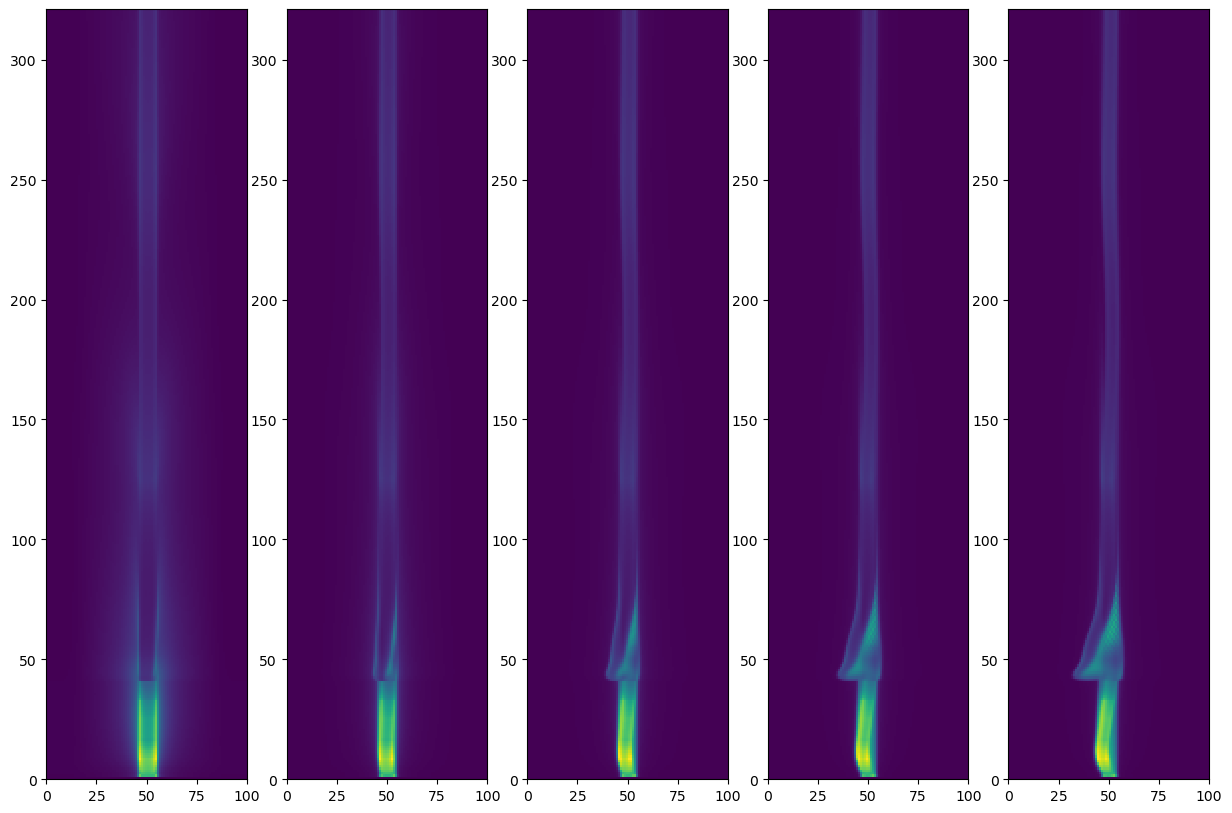

In [225]:
kr=16
fig,ax=plt.subplots(1,5,figsize=(15,10))
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt[:,kr,i,1:nq[kr]]-outintt[0,kr,i,1:nq[kr]])
    #ax.flatten()[i].set_ylim([0,70])


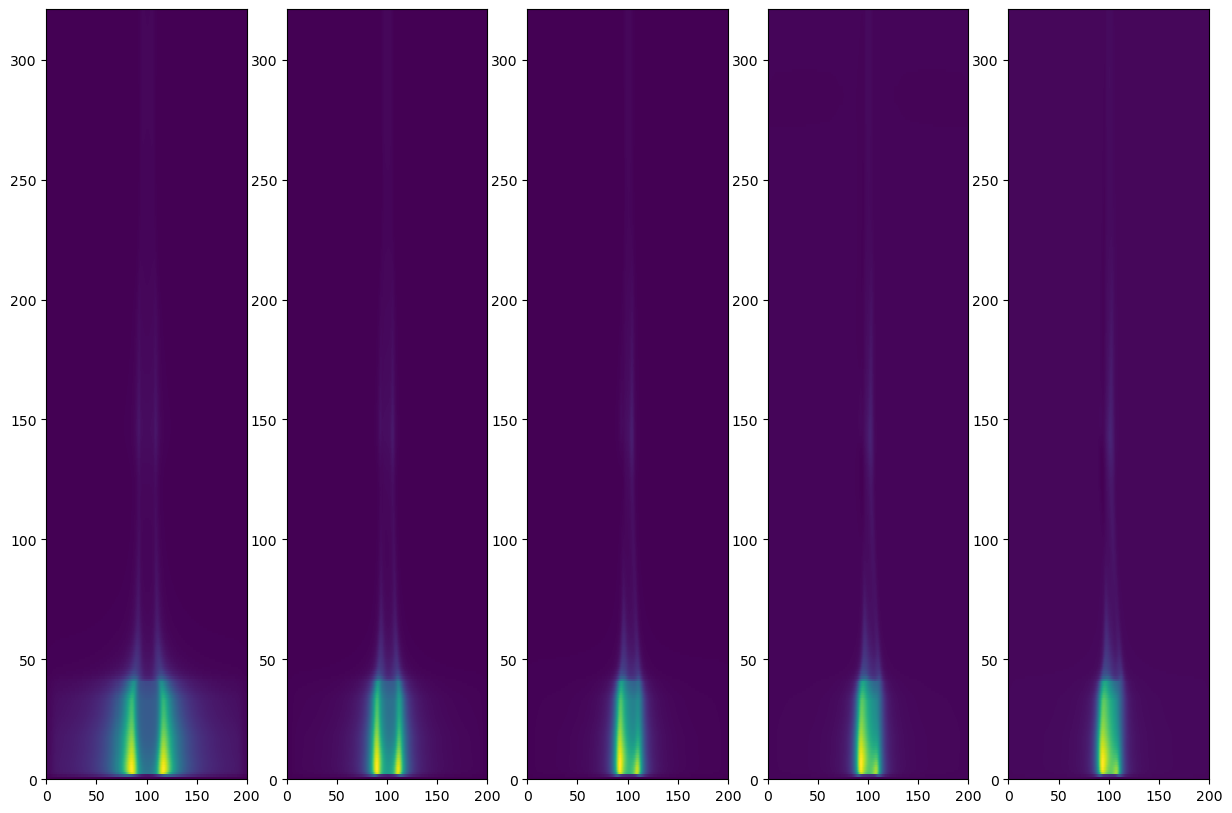

In [226]:
kr=4
fig,ax=plt.subplots(1,5,figsize=(15,10))
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt_2[:,kr,i,1:nq[kr]]-outintt_2[0,kr,i,1:nq[kr]])
    #ax.flatten()[i].set_ylim([0,70])

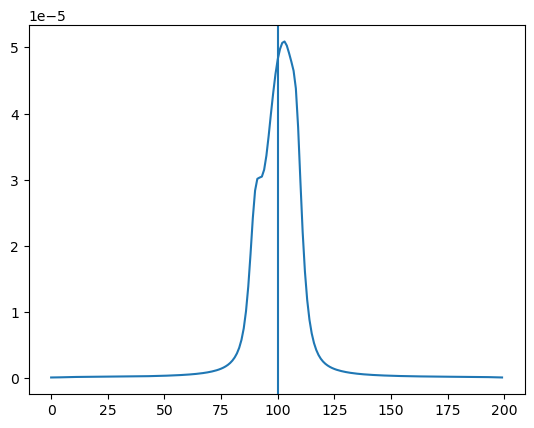

In [227]:
plt.plot(outintt_3[42,kr,4,1:nq[kr]]-outintt[0,kr,4,1:nq[kr]])
plt.axvline(100)

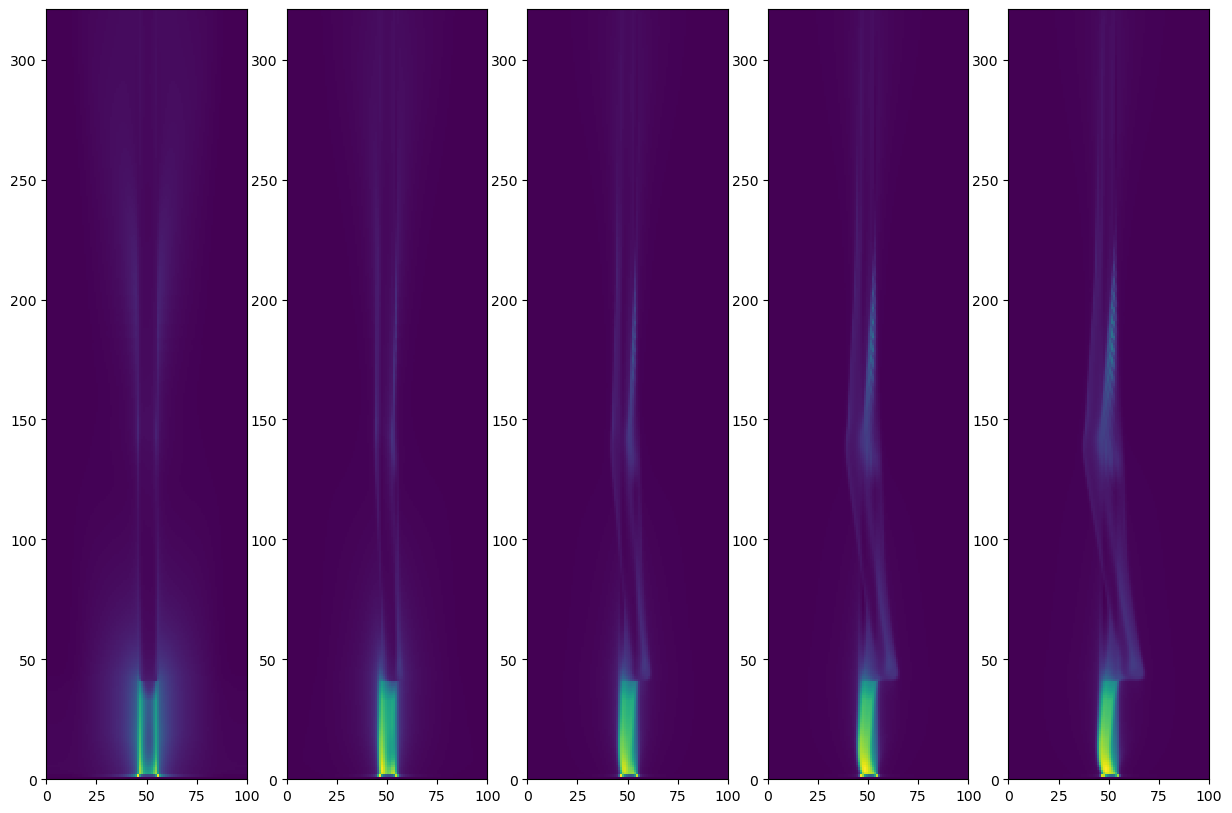

In [228]:
kr=16
fig,ax=plt.subplots(1,5,figsize=(15,10))
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt_2[:,kr,i,1:nq[kr]]-outintt_2[0,kr,i,1:nq[kr]])
    #ax.flatten()[i].set_ylim([0,70])


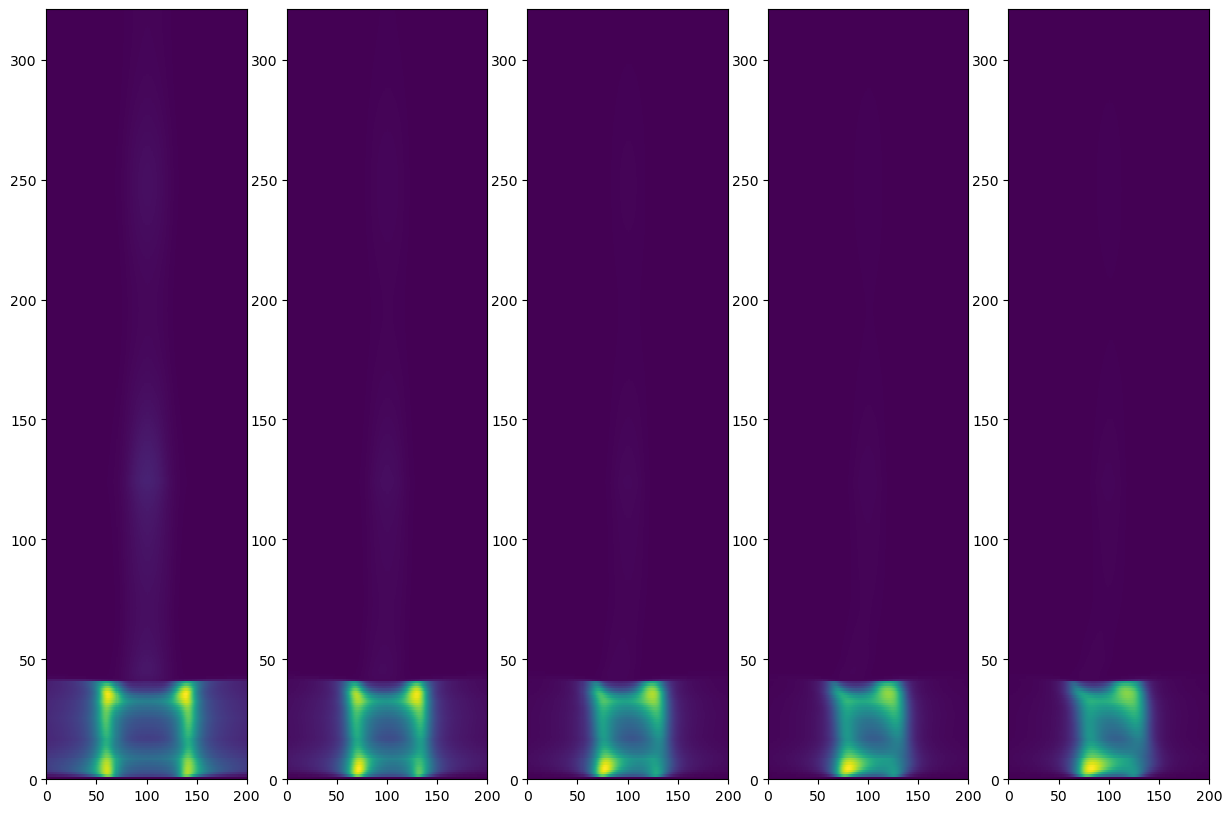

In [229]:
kr=3
fig,ax=plt.subplots(1,5,figsize=(15,10))
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt[:,kr,i,1:nq[kr]]-outintt[0,kr,i,1:nq[kr]])
    #ax.flatten()[i].set_ylim([0,70])


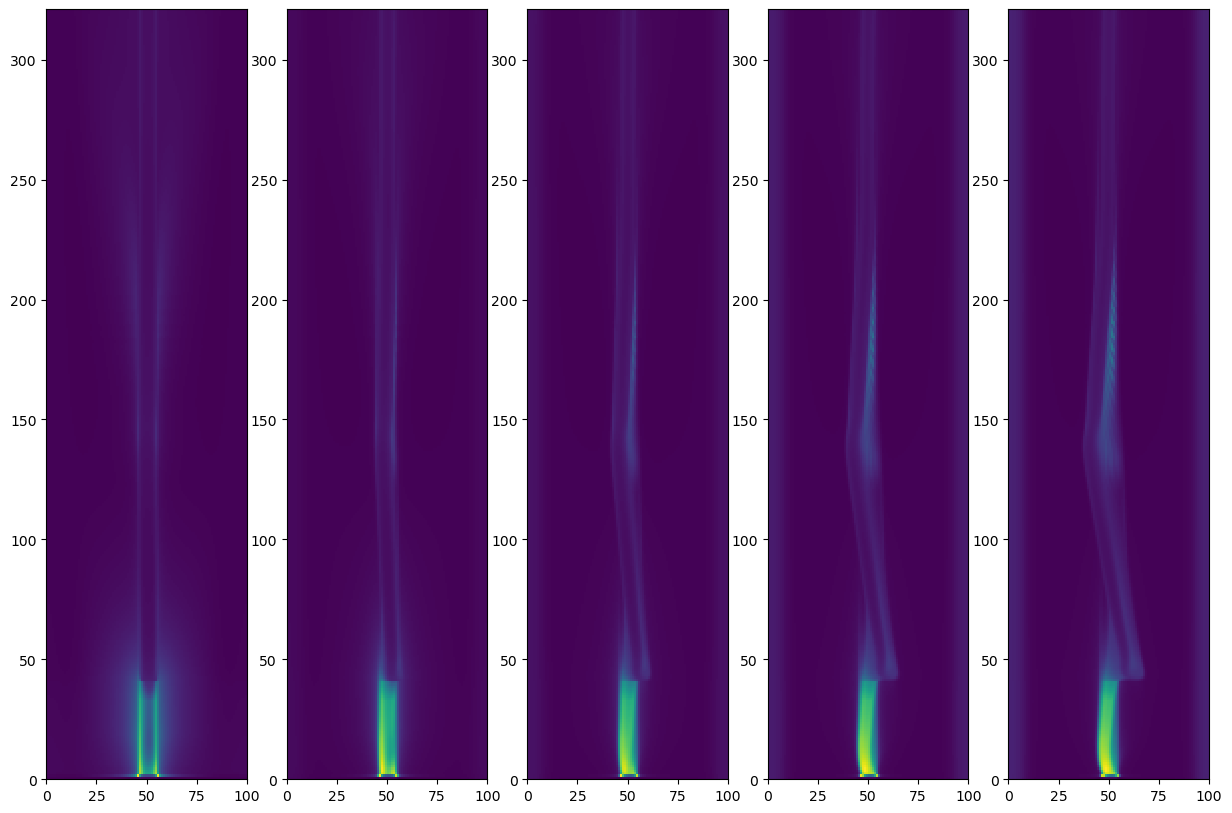

In [230]:
fig,ax=plt.subplots(1,5,figsize=(15,10))
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt_2[:,16,i,1:nq[16]])
    #ax.flatten()[i].set_ylim([0,70])


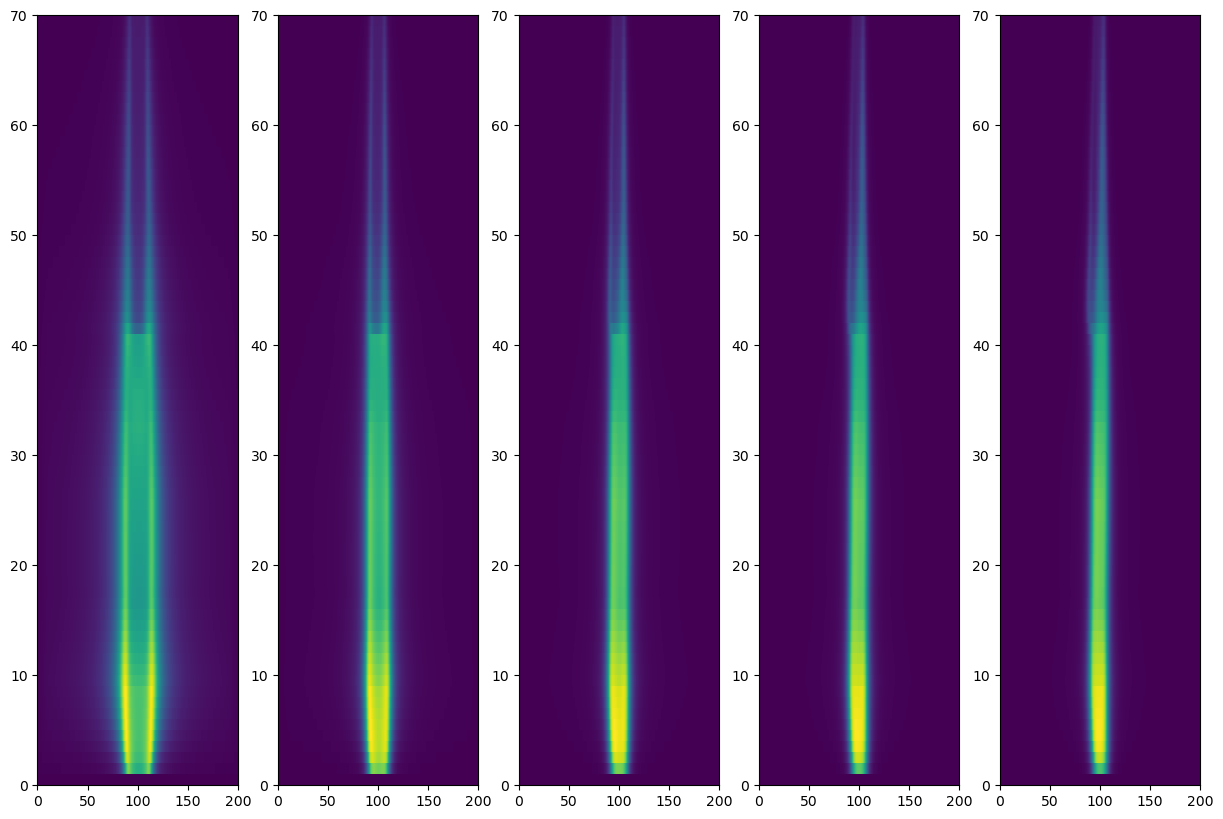

In [231]:
fig,ax=plt.subplots(1,5,figsize=(15,10));
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt[:,4,i,1:nq[4]]-outintt[0,4,i,1:nq[4]])
    ax.flatten()[i].set_ylim([0,70])


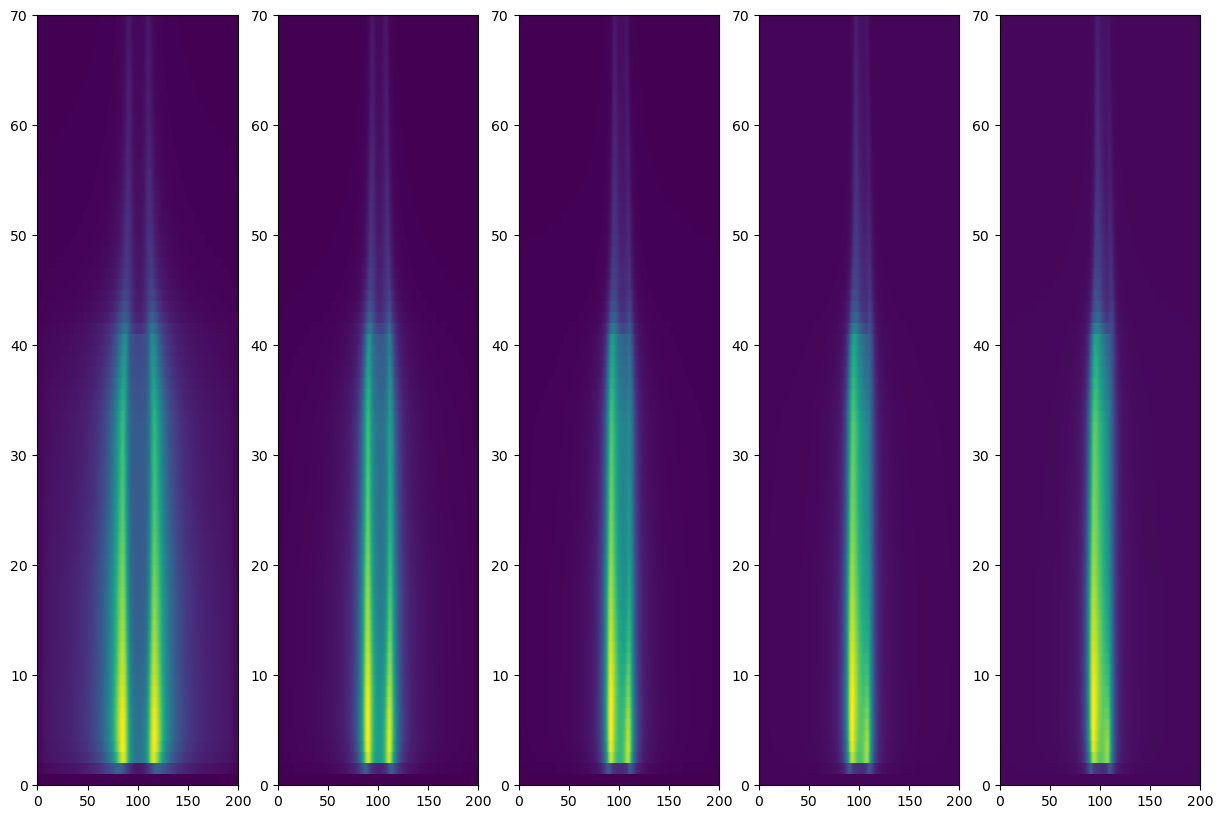

In [232]:
fig,ax=plt.subplots(1,5,figsize=(15,10));
for i in range(5):
    ax.flatten()[i].pcolormesh(outintt_2[:,4,i,1:nq[4]]-outintt[0,4,i,1:nq[4]])
    ax.flatten()[i].set_ylim([0,70])


In [233]:
headon_caii = outintt[:,16,4,1:nq[16]]
headon_caii_2 = outintt_2[:,16,4,1:nq[16]]
headon_caii_3 = outintt_3[:,16,4,1:nq[16]]
headon_caii_4 = outintt_4[:,16,4,1:nq[16]]
headon_caii_5 = outintt_5[:,16,4,1:nq[16]]

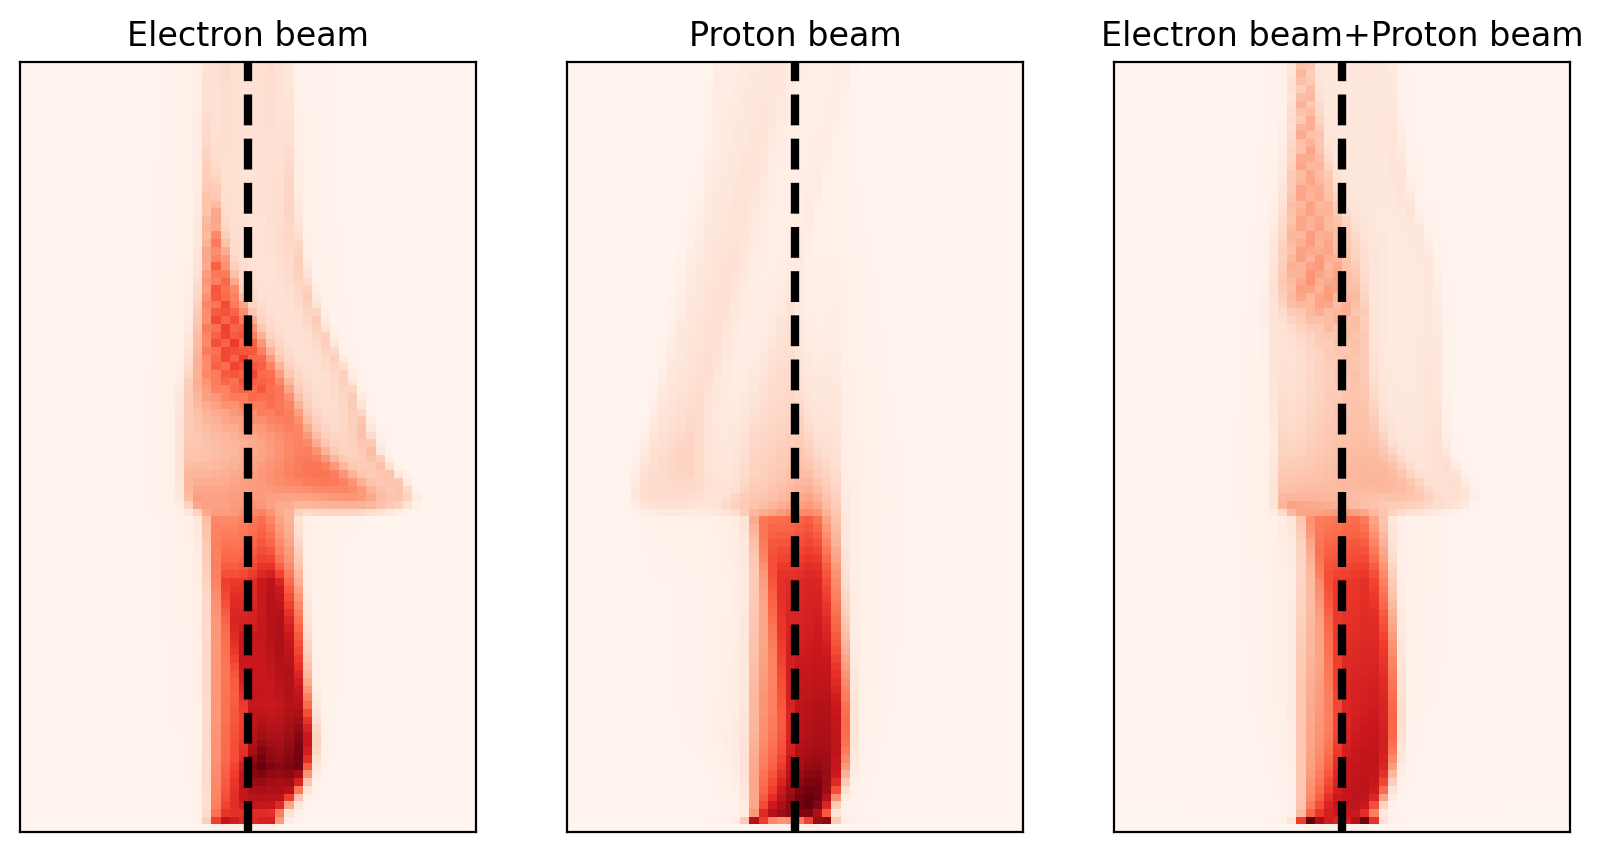

In [234]:
fig,ax=plt.subplots(1,3,dpi=200,figsize=(10,5))
ax.flatten()[0].pcolormesh(headon_caii,cmap='Reds')
ax.flatten()[1].pcolormesh(headon_caii_2,cmap='Reds')
ax.flatten()[2].pcolormesh(headon_caii_3,cmap='Reds')

ax.flatten()[0].set_xticks([])
ax.flatten()[1].set_xticks([])
ax.flatten()[2].set_xticks([])

ax.flatten()[0].set_yticks([])
ax.flatten()[1].set_yticks([])
ax.flatten()[2].set_yticks([])

ax.flatten()[0].set_xlim([25,75])
ax.flatten()[1].set_xlim([25,75])
ax.flatten()[2].set_xlim([25,75])

ax.flatten()[0].set_ylim([0,100])
ax.flatten()[1].set_ylim([0,100])
ax.flatten()[2].set_ylim([0,100])

ax.flatten()[0].invert_xaxis()
ax.flatten()[1].invert_xaxis()
ax.flatten()[2].invert_xaxis()

ax.flatten()[0].set_title('Electron beam')
ax.flatten()[1].set_title('Proton beam')
ax.flatten()[2].set_title('Electron beam+Proton beam')

ax.flatten()[0].axvline(50,c='black',linewidth=3,linestyle='dashed')
ax.flatten()[1].axvline(50,c='black',linewidth=3,linestyle='dashed')
ax.flatten()[2].axvline(50,c='black',linewidth=3,linestyle='dashed')


In [235]:
freq = q[16,0:nq[16]-1]*qnorm

(0.0, 5.5e-05)

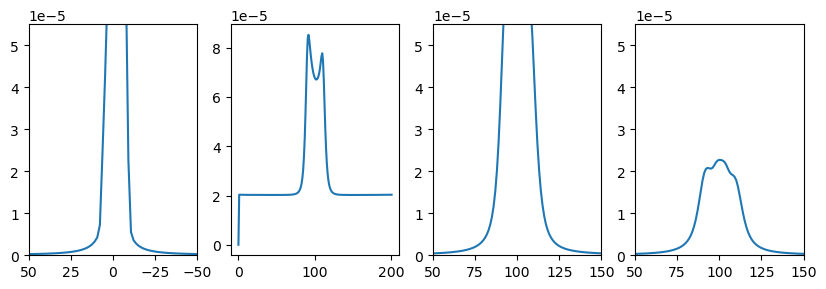

In [236]:
t = 20
fig,ax=plt.subplots(1,4,figsize=(10,3))
ax.flatten()[0].plot(freq,(caii_h[t,:]-caii_h[0,:]))
ax.flatten()[1].plot(halpha[2,:])

ax.flatten()[2].plot(hbeta[t,:]-hbeta[0,:])
ax.flatten()[3].plot(hgamma[t,:]-hgamma[0,:])

ax.flatten()[0].set_xlim([-50,50])
#ax.flatten()[1].set_xlim([50,150])
ax.flatten()[2].set_xlim([50,150])
ax.flatten()[3].set_xlim([50,150])

ax.flatten()[0].invert_xaxis()
ax.flatten()[0].set_ylim([0,5.5e-5])
#ax.flatten()[1].set_ylim([0,5.5e-5])
ax.flatten()[2].set_ylim([0,5.5e-5])
ax.flatten()[3].set_ylim([0,5.5e-5])



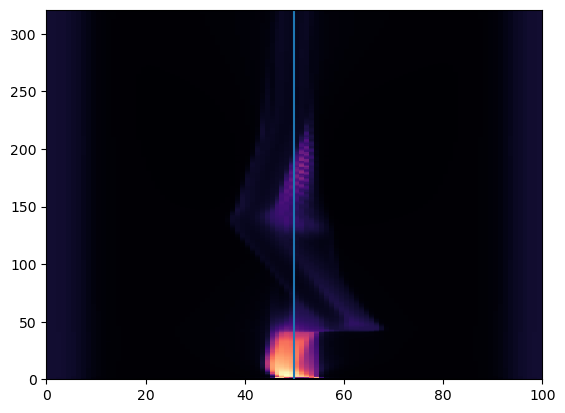

In [237]:
plt.pcolormesh(headon_caii_2,cmap='magma')
#plt.ylim([0,600])
plt.axvline(50)

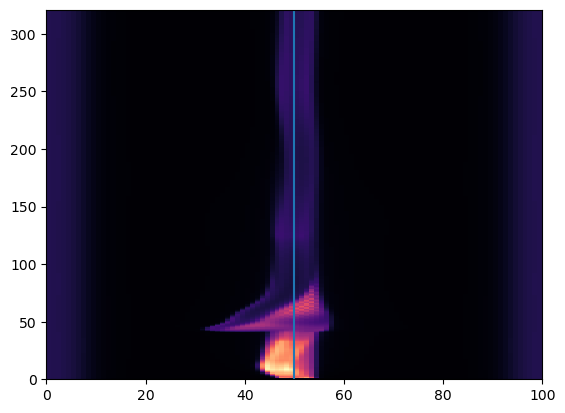

In [238]:
plt.pcolormesh(headon_caii,cmap='magma')
#plt.ylim([0,600])
plt.axvline(50)

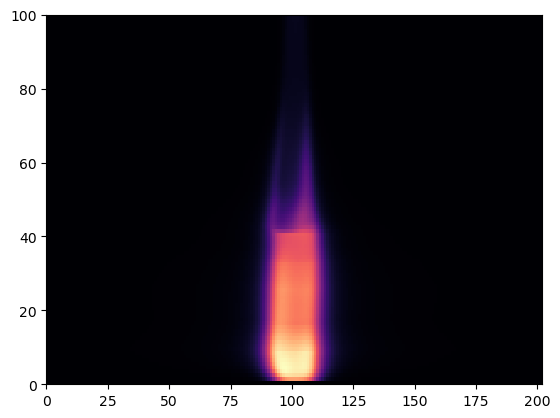

In [239]:
plt.pcolormesh(hbeta[0:100]-hbeta[0,:],cmap='magma')
#plt.xlim([25,75])

In [240]:
samples = np.arange(0,160,1)
#samples = [110,150]
samples

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159])

In [241]:


kr=16
wavelengths = (doppler_shift_to_wavelength(396.846,q[kr,:-1]*qnorm))


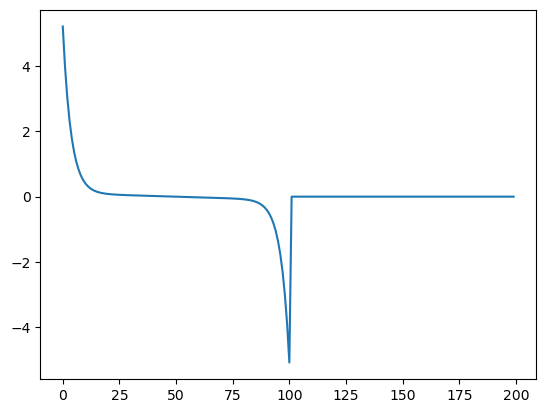

In [242]:
plt.plot(wavelengths)

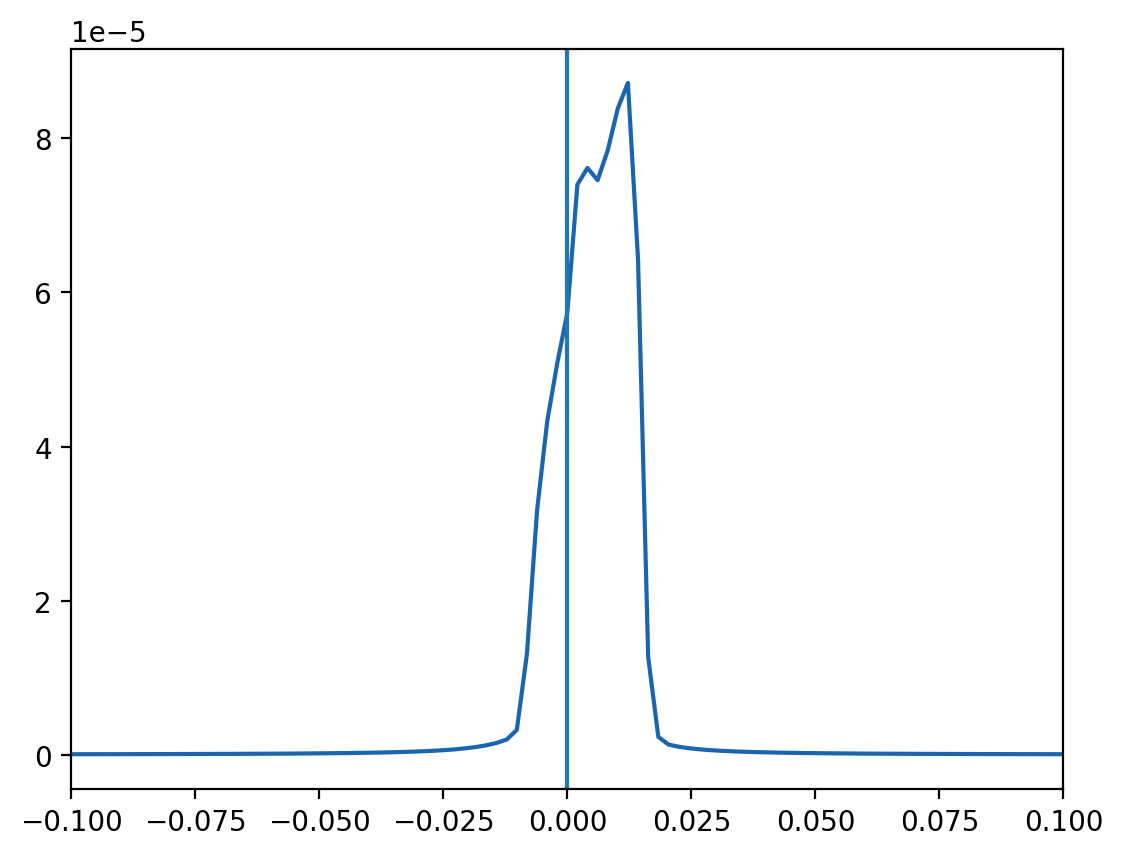

In [243]:

kr=16
wavelengths = (doppler_shift_to_wavelength(396.85,q[kr,:-1]*qnorm))
samples = [14]

fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(wavelengths[0:100],headon_caii[samples[i],:]-headon_caii[0,:],c=cmap_choice2[i],label=samples[i]/2)
#ax.legend(fontsize=5)
ax.set_xlim([-.1,.1])
ax.axvline(0)
#ax.invert_xaxis()

In [244]:
wavelengths

<Quantity [ 5.21268409e+00,  3.96970040e+00,  3.03021298e+00,
            2.31906372e+00,  1.78010148e+00,  1.37120943e+00,
            1.06070221e+00,  8.24687588e-01,  6.45118294e-01,
            5.08344016e-01,  4.04029737e-01,  3.24344534e-01,
            2.63351398e-01,  2.16547199e-01,  1.80515226e-01,
            1.52662425e-01,  1.31020453e-01,  1.14094957e-01,
            1.00751308e-01,  9.01279306e-02,  8.15705524e-02,
            7.45822988e-02,  6.87858147e-02,  6.38945062e-02,
            5.96907065e-02,  5.60090958e-02,  5.27241106e-02,
            4.97403823e-02,  4.69854755e-02,  4.44043728e-02,
            4.19552864e-02,  3.96064764e-02,  3.73338350e-02,
            3.51190510e-02,  3.29482157e-02,  3.08107644e-02,
            2.86986719e-02,  2.66058420e-02,  2.45276432e-02,
            2.24605559e-02,  2.04019049e-02,  1.83496557e-02,
            1.63022593e-02,  1.42585347e-02,  1.22175787e-02,
            1.01786974e-02,  8.14135306e-03,  6.10512352e-03,
        

In [245]:
dkist_file = '/Users/coletamburri/Desktop/11_Aug_2024_Cclass_Flare/Processed_ViSP_VBI_11Aug2024/ViSP_spectra_processed_11Aug24_CaII.npz'
dkist_file = np.load(dkist_file)
dkist_wl = dkist_file['wl']
dkist_int = dkist_file['flare']
dkist_avg = np.mean(dkist_int[lowvisp:highvisp,caII_low:caII_high,:],1)
dkist_time = dkist_file['time']

In [246]:
# for big redshifts (region D, r1a)
cc=[(np.float64(43.114919354838705), np.float64(1306.922899884925)),
 (np.float64(47.151209677419345), np.float64(1310.4244616143349)),
 (np.float64(51.37096774193548), np.float64(1317.4275850731544)),
 (np.float64(53.75604838709677), np.float64(1327.932270261384)),
 (np.float64(56.87499999999999), np.float64(1334.9353937202036)),
 (np.float64(58.52620967741935), np.float64(1352.4432023672528)),
 (np.float64(60.360887096774185), np.float64(1355.9447640966628)),
 (np.float64(62.195564516129025), np.float64(1345.4400789084332)),
 (np.float64(64.7641129032258), np.float64(1338.4369554496136))]

# for big blueshifts (r1b)
cc=[(np.float64(84.76209677419354), np.float64(816.7042577675488)),
 (np.float64(84.39516129032258), np.float64(771.1839552852211)),
 (np.float64(87.88104838709677), np.float64(809.7011343087293)),
 (np.float64(87.88104838709677), np.float64(855.2214367910569)),
 (np.float64(81.27620967741935), np.float64(746.6730231793522)),
 (np.float64(74.85483870967741), np.float64(715.1589676146637)),
 (np.float64(77.97379032258064), np.float64(736.1683379911228)),
 (np.float64(71.73588709677418), np.float64(701.1527206970245)),
 (np.float64(69.16733870967741), np.float64(697.6511589676147))]

In [246]:
lowvisp=148
highvisp=148+91

KeyboardInterrupt: 

In [ ]:
samples = np.arange(50,60,2)
fig,ax1=plt.subplots(dpi=200)

l=0

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax1.plot(wavelengths[0:100],normalize_range(headon_caii[samples[i],:]-headon_caii[0,:],10,-10),c=cmap_choice2[i],label=timet[i])
#ax1.legend(fontsize=5)
ax1.set_xlim([-.1,.1])
ax1.axvline(0)
#ax1.set_ylim([0,0.00010])
ax1.plot(dkist_wl-396.846,normalize_range(dkist_int[lowvisp+int(cc[l][0]),:,int(cc[l][1])]/1e6,caII_low-50,caII_high+50),c='black',linestyle='dashed')
#ax1.plot(dkist_wl-396.846,normalize_range(dkist_int[lowvisp+int(cc[0][0]),:,int(cc[0][1])]/1e6,caII_low-50,caII_high+50),c='black',linestyle='dotted')


In [ ]:
np.linspace(0,1,numcolor)

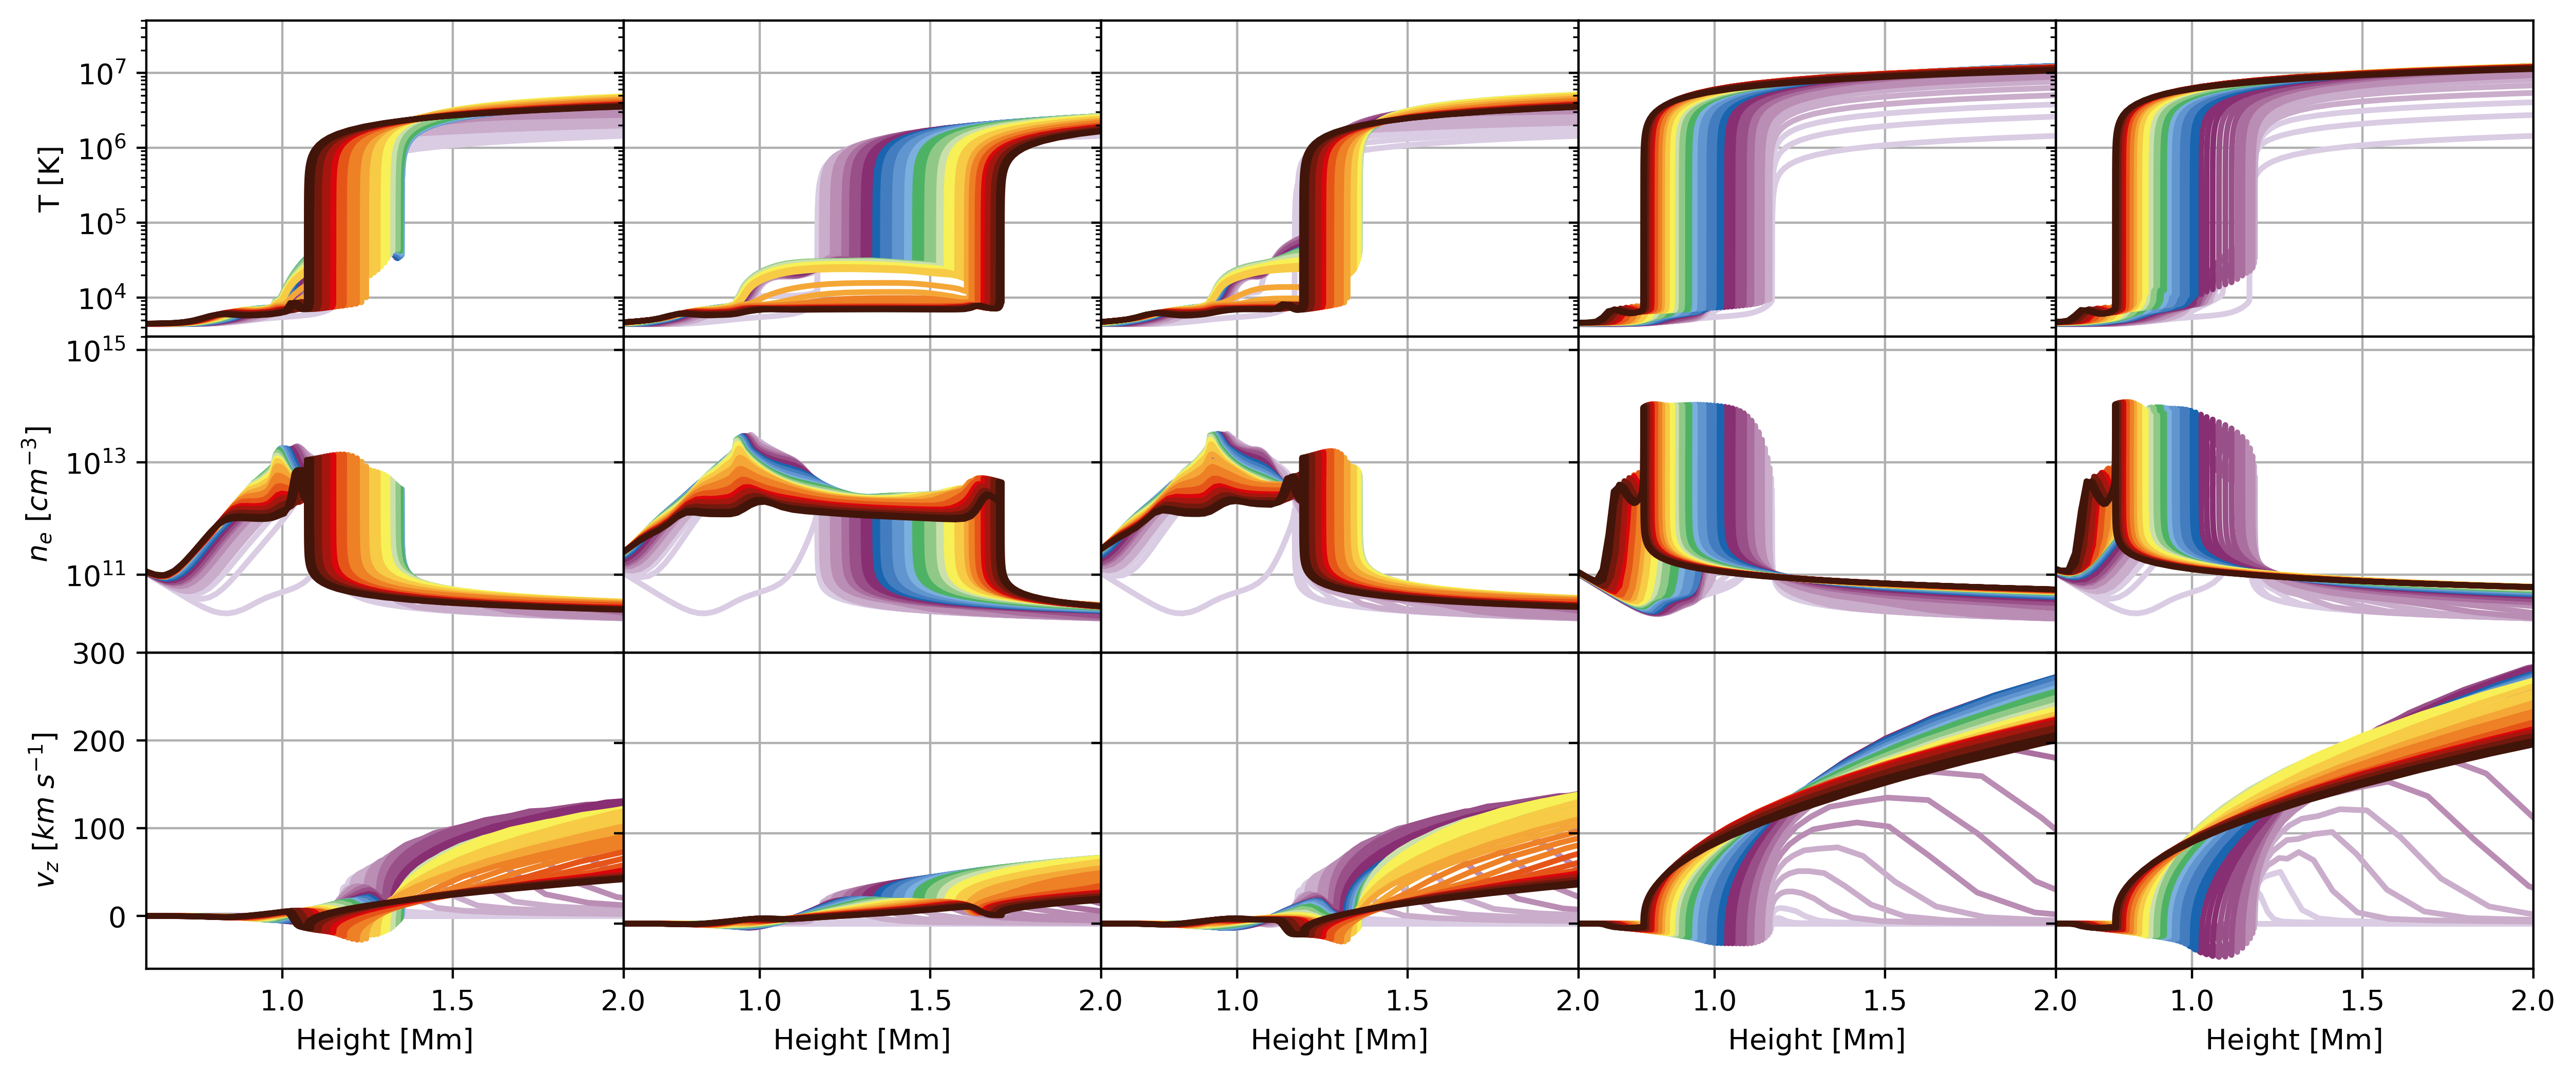

In [269]:
interval = 1
timesinit =np.concatenate([np.arange(0,40,interval),[45,50,60,70,80,100,130,160]])
timesinit = np.arange(0,60,interval)
lowz = 0.6
highz = 2

fig,[[ax1,ax2,ax3,ax4,ax5],[ax6,ax7,ax8,ax9,ax10],[ax11,ax12,ax13,ax14,ax15]]=plt.subplots(3,5,dpi=400,figsize=(15,6))

numcolor = len(timesinit)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(timesinit)):
    ax1.plot(z1t[int(timesinit[i]),:]/1e8,(tg1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax1.grid()
ax1.set_ylabel('T [K]')
ax1.set_xlim([lowz,highz])
ax1.set_ylim([3e3,5e7])
ax1.set_yscale('log')

for i in range(len(timesinit)):
    ax2.plot(z1t_2[int(timesinit[i]),:]/1e8,(tg1t_2[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax2.grid()
ax2.set_xlim([lowz,highz])
ax2.set_ylim([3e3,5e7])
ax2.set_yscale('log')

for i in range(len(timesinit)):
    ax3.plot(z1t_3[int(timesinit[i]),:]/1e8,(tg1t_3[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax3.grid()
ax3.set_xlim([lowz,highz])
ax3.set_ylim([3e3,5e7])
ax3.set_yscale('log')

for i in range(len(timesinit)):
    ax4.plot(z1t_4[int(timesinit[i]),:]/1e8,(tg1t_4[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax4.grid()
ax4.set_xlim([lowz,highz])
ax4.set_ylim([3e3,5e7])
ax4.set_yscale('log')


for i in range(len(timesinit)):
    ax5.plot(z1t_5[int(timesinit[i]),:]/1e8,(tg1t_5[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax5.grid()
ax5.set_xlim([lowz,highz])
ax5.set_ylim([3e3,5e7])
ax5.set_yscale('log')


for i in range(len(timesinit)):
    ax6.plot(z1t[int(timesinit[i]),:]/1e8,(ne1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax6.grid()
ax6.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax6.set_xlim([lowz,highz])
ax6.set_yscale('log')

for i in range(len(timesinit)):
    ax7.plot(z1t_2[int(timesinit[i]),:]/1e8,(ne1t_2[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax7.grid()
ax7.set_xlim([lowz,highz])
ax7.set_yscale('log')


for i in range(len(timesinit)):
    ax8.plot(z1t_3[int(timesinit[i]),:]/1e8,(ne1t_3[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax8.grid()
ax8.set_xlim([lowz,highz])
ax8.set_yscale('log')


for i in range(len(timesinit)):
    ax9.plot(z1t_4[int(timesinit[i]),:]/1e8,(ne1t_4[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax9.grid()
ax9.set_xlim([lowz,highz])
ax9.set_yscale('log')



for i in range(len(timesinit)):
    ax10.plot(z1t_5[int(timesinit[i]),:]/1e8,(ne1t_5[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])
ax10.grid()
ax10.set_xlim([lowz,highz])
ax10.set_yscale('log')


for i in range(len(timesinit)):
    ax11.plot(z1t[int(timesinit[i]),:]/1e8,(vz1t[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)
ax11.grid()
ax11.set_ylabel(r'$v_z$ [$km\;s^{-1}$]')
ax11.set_xlim([lowz,highz])
ax11.set_ylim([-60,300])

for i in range(len(timesinit)):
    ax12.plot(z1t_2[int(timesinit[i]),:]/1e8,(vz1t_2[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)
ax12.grid()
ax12.set_xlim([lowz,highz])
ax12.set_ylim([-50,300])

for i in range(len(timesinit)):
    ax13.plot(z1t_3[int(timesinit[i]),:]/1e8,(vz1t_3[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)
ax13.grid()
ax13.set_xlim([lowz,highz])
ax13.set_ylim([-50,300])

for i in range(len(timesinit)):
    ax14.plot(z1t_4[int(timesinit[i]),:]/1e8,(vz1t_4[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)
ax14.grid()
ax14.set_xlim([lowz,highz])
ax14.set_ylim([-50,300])

for i in range(len(timesinit)):
    ax15.plot(z1t_5[int(timesinit[i]),:]/1e8,(vz1t_5[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)
ax15.grid()
ax15.set_xlim([lowz,highz])
ax15.set_ylim([-50,300])

# ax1.set_title('Electron beam, region A/B')
# ax2.set_title('Electron beam, region C')
# ax3.set_title('Electron beam, region D')

# ax1.set_title('Region AB - EB')
# ax2.set_title('TC')
# ax3.set_title('TC')....

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])

ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax8.set_xticklabels([])
ax9.set_xticklabels([])
ax10.set_xticklabels([])


ax11.set_xlabel('Height [Mm]')
ax12.set_xlabel('Height [Mm]')
ax13.set_xlabel('Height [Mm]')
ax14.set_xlabel('Height [Mm]')
ax15.set_xlabel('Height [Mm]')

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

ax7.set_yticklabels([])
ax8.set_yticklabels([])
ax9.set_yticklabels([])
ax10.set_yticklabels([])

ax12.set_yticklabels([])
ax13.set_yticklabels([])
ax14.set_yticklabels([])
ax15.set_yticklabels([])


plt.subplots_adjust(hspace=0,wspace=0)









In [217]:
wavelengths[0:100]

<Quantity [ 5.21268409e+00,  3.96970040e+00,  3.03021298e+00,
            2.31906372e+00,  1.78010148e+00,  1.37120943e+00,
            1.06070221e+00,  8.24687588e-01,  6.45118294e-01,
            5.08344016e-01,  4.04029737e-01,  3.24344534e-01,
            2.63351398e-01,  2.16547199e-01,  1.80515226e-01,
            1.52662425e-01,  1.31020453e-01,  1.14094957e-01,
            1.00751308e-01,  9.01279306e-02,  8.15705524e-02,
            7.45822988e-02,  6.87858147e-02,  6.38945062e-02,
            5.96907065e-02,  5.60090958e-02,  5.27241106e-02,
            4.97403823e-02,  4.69854755e-02,  4.44043728e-02,
            4.19552864e-02,  3.96064764e-02,  3.73338350e-02,
            3.51190510e-02,  3.29482157e-02,  3.08107644e-02,
            2.86986719e-02,  2.66058420e-02,  2.45276432e-02,
            2.24605559e-02,  2.04019049e-02,  1.83496557e-02,
            1.63022593e-02,  1.42585347e-02,  1.22175787e-02,
            1.01786974e-02,  8.14135306e-03,  6.10512352e-03,
        

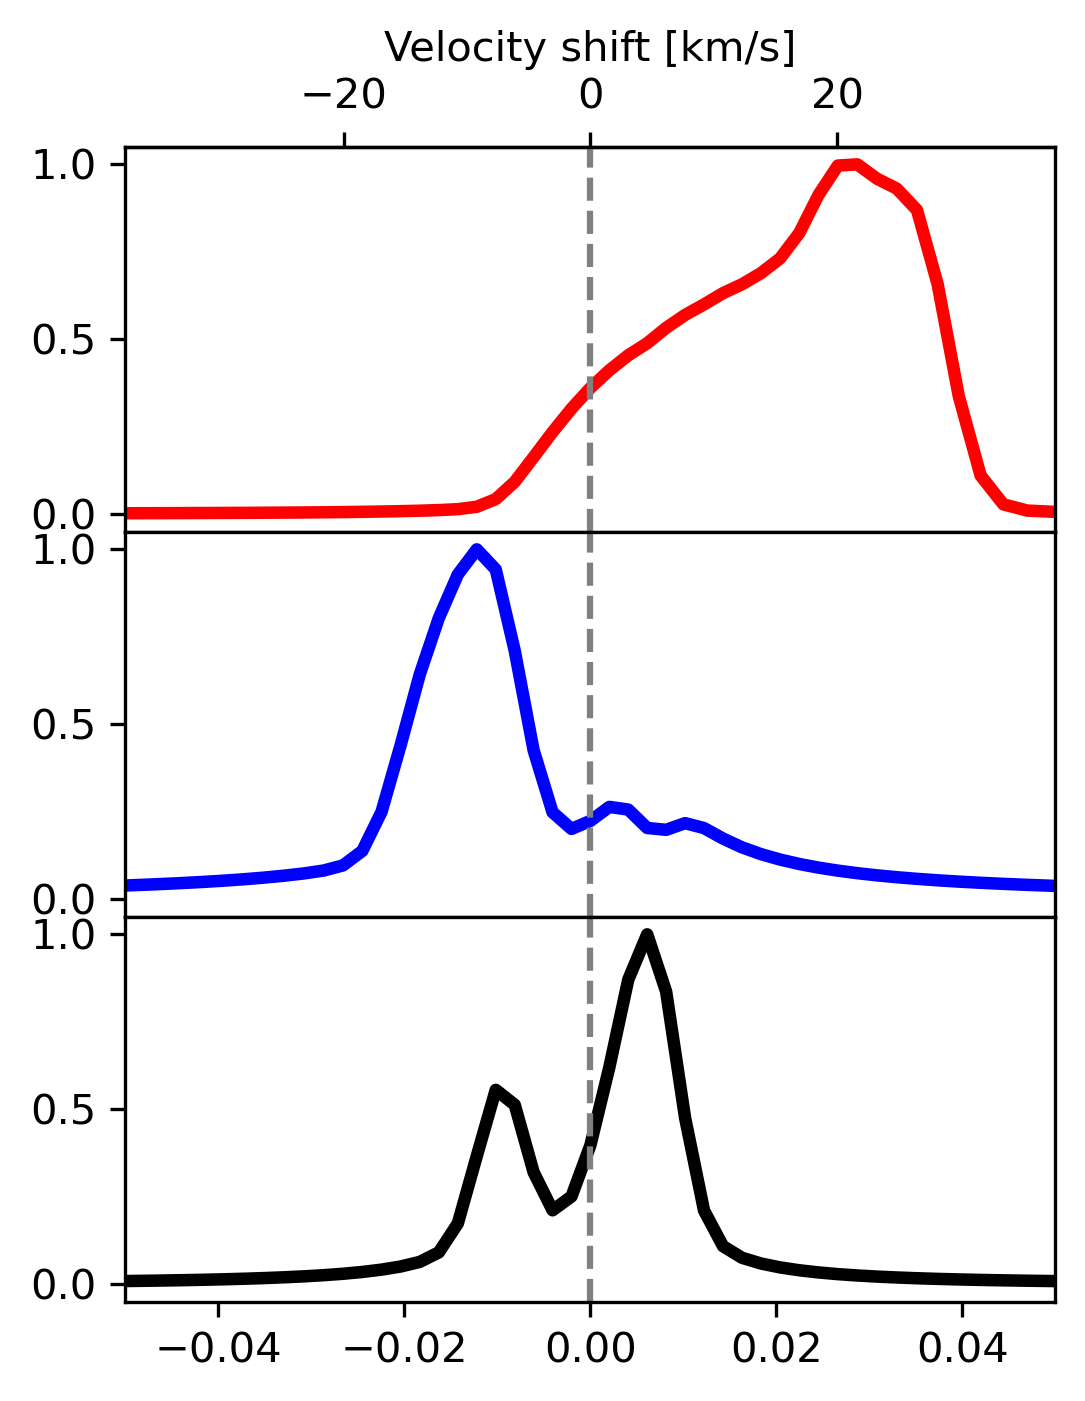

In [155]:
fwhm=3
mu=1
samp1= 18
samp2 = 80
samp3 = 40
fig,[ax1,ax2,ax3]=plt.subplots(3,1,dpi=300,figsize=(4,5))
ax1.plot(wavelengths[0:100],normalize_range(psf_adjust(wavelengths[0:100]/u.nm, headon_caii[samp1,:]*1.9e11-headon_caii[0,:]*1.9e11,fwhm,wavelengths[0:100]/u.nm,ntw,gaussian_psf)/1e6,0,-1),c='red',linewidth=3)
ax2.plot(wavelengths[0:100],normalize_range(psf_adjust(wavelengths[0:100]/u.nm, headon_caii_2[samp2,:]*1.9e11-headon_caii_2[0,:]*1.9e11,fwhm,wavelengths[0:100]/u.nm,ntw,gaussian_psf)/1e6,0,-1),c='blue',linewidth=3)
ax3.plot(wavelengths[0:100],normalize_range(psf_adjust(wavelengths[0:100]/u.nm, headon_caii_3[samp3,:]*1.9e11-headon_caii_3[0,:]*1.9e11,fwhm,wavelengths[0:100]/u.nm,ntw,gaussian_psf)/1e6,0,-1),c='black',linewidth=3)


ax1.set_xlim([-.05,.05])
ax1.axvline(0,linestyle='dashed',c='grey')
ax2.set_xlim([-.05,.05])
ax2.axvline(0,linestyle='dashed',c='grey')
ax3.set_xlim([-.05,.05])
ax3.axvline(0,linestyle='dashed',c='grey')

ax1.set_xticks([])
ax2.set_xticks([])

ax1.set_xlabel('Wavelength shift [nm]')


# ax3.set_title('Electron beam; high $E_c$, low flux; t=20 s')
# ax1.set_title('Electron beam; t = 9 s')
# ax2.set_title('Proton beam; t = 40 s')

secaxx1 = ax1.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx1.set_xlabel('Velocity shift [km/s]')


plt.subplots_adjust(hspace=0)

Text(0.5, 1.0, 'region D - EB+PB')

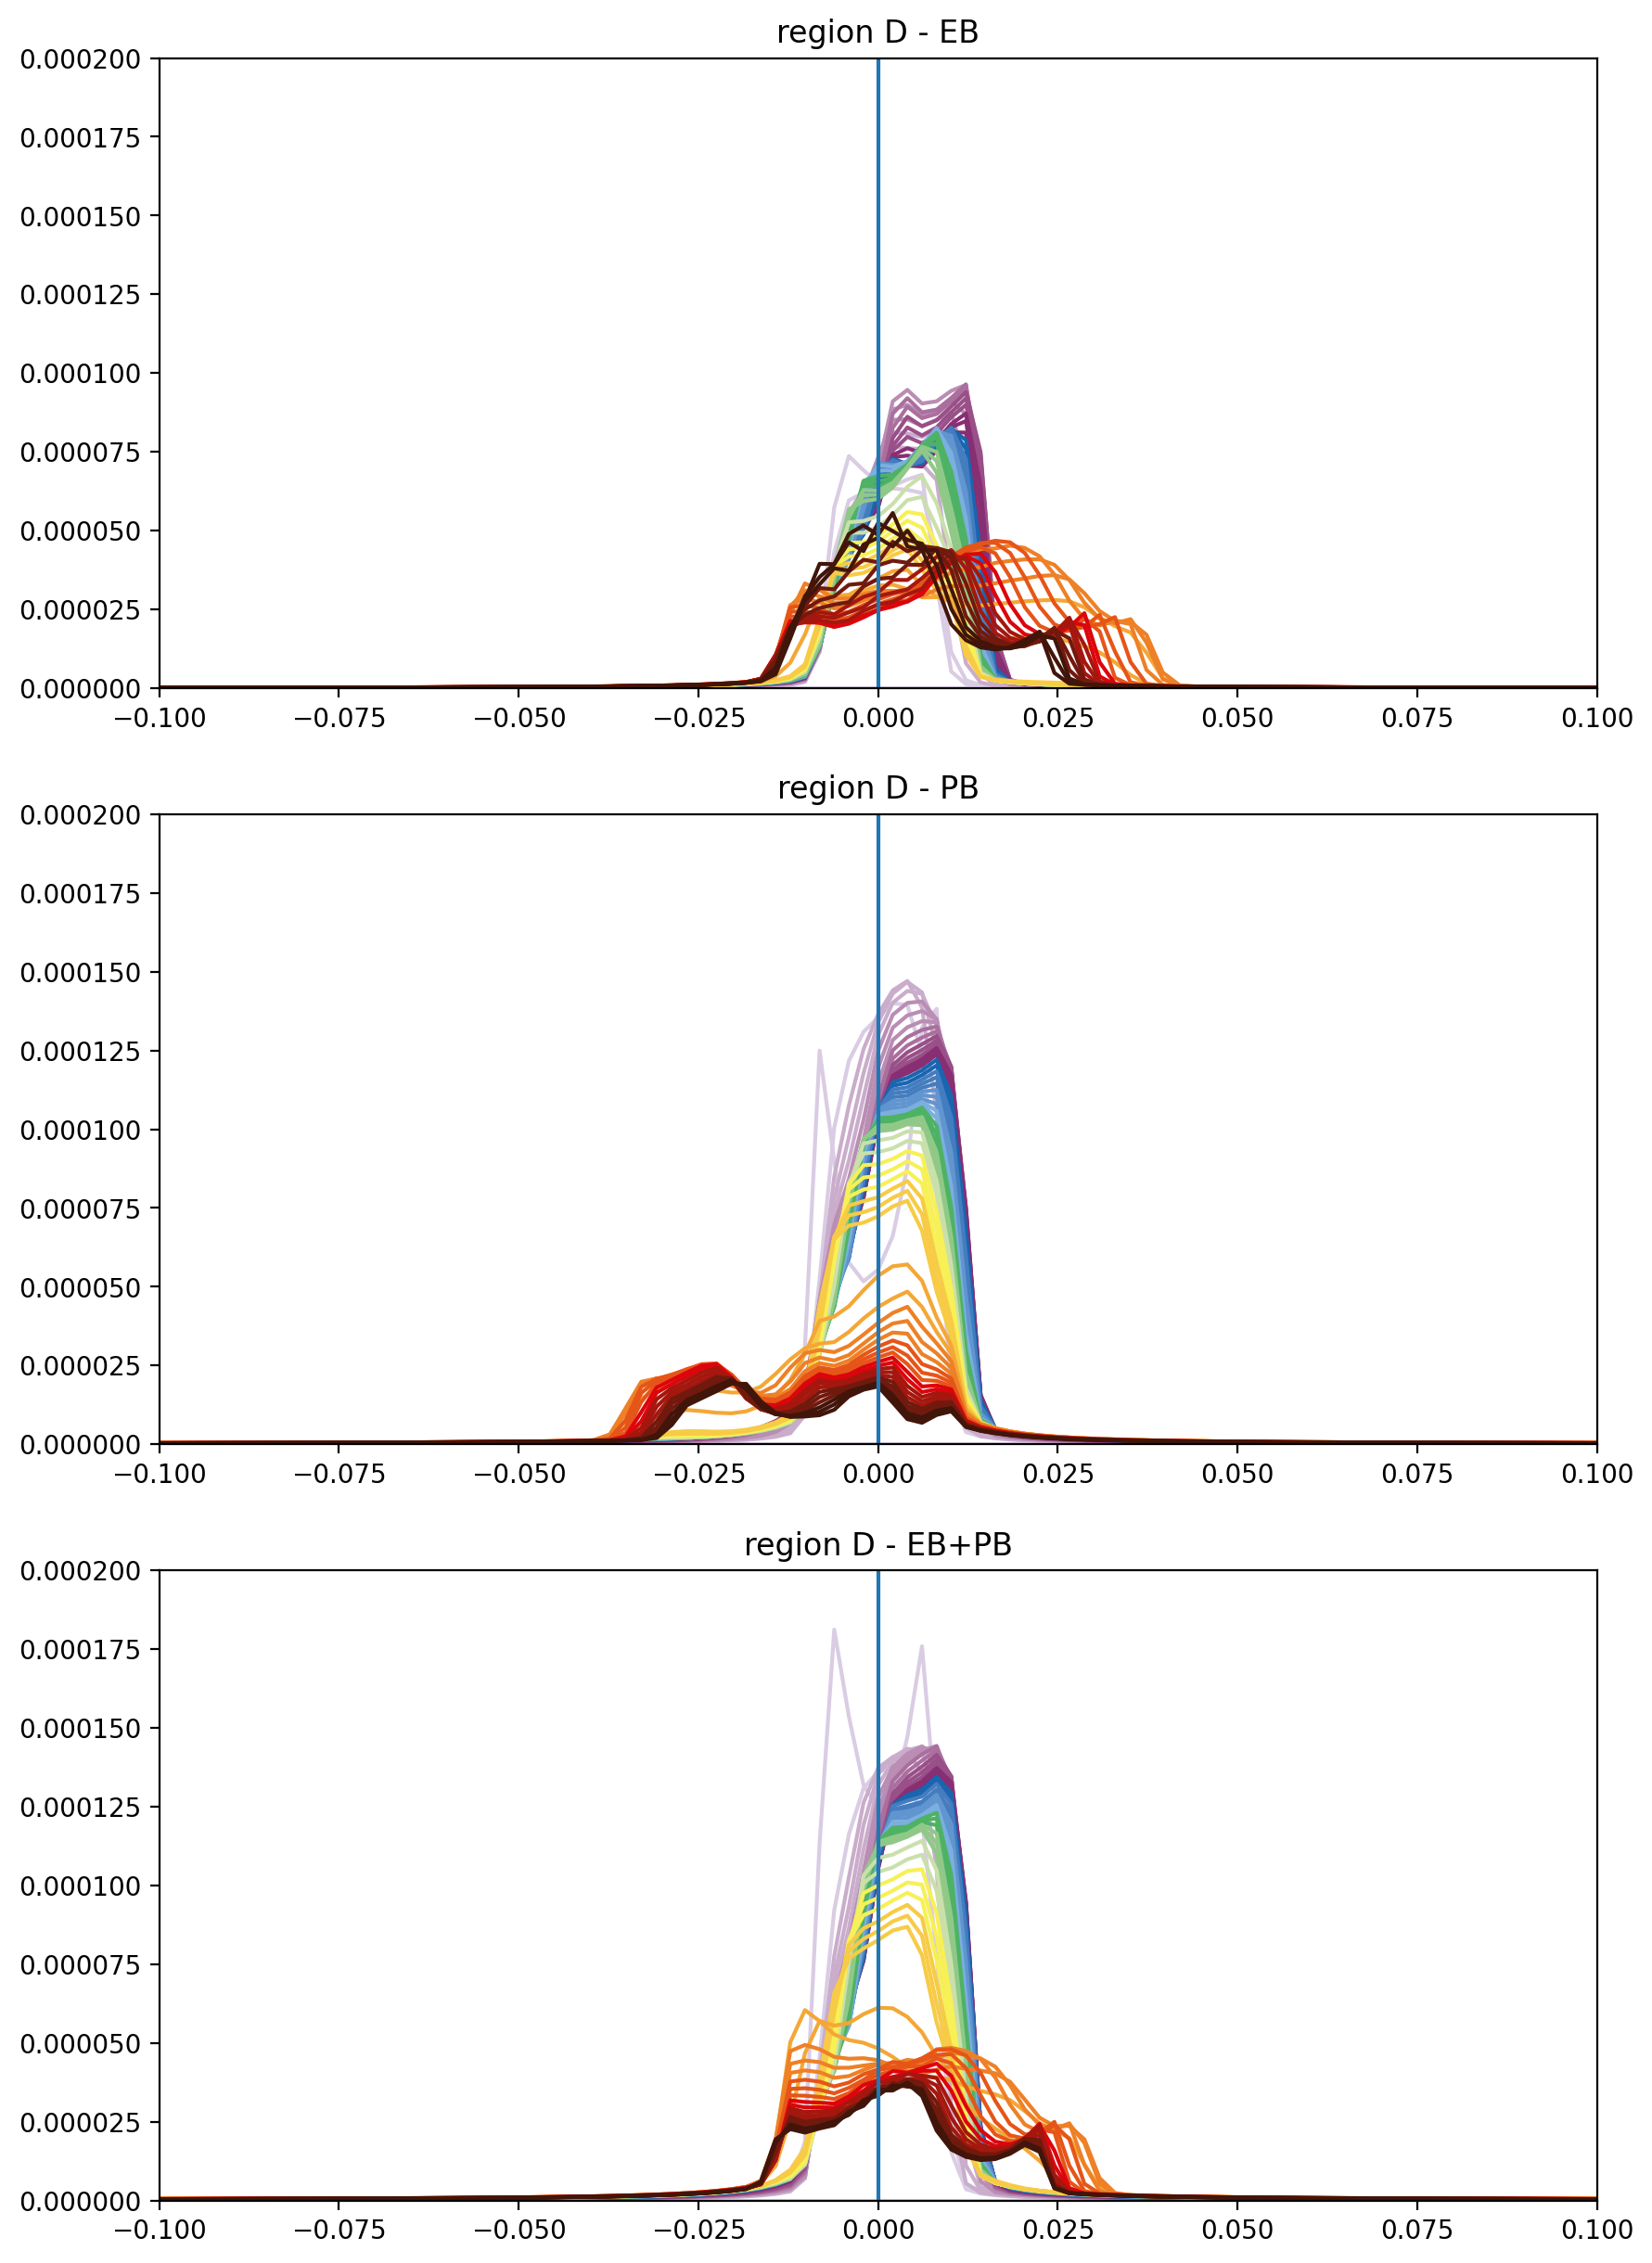

In [19]:
interval = 1
samples =np.concatenate([np.arange(0,40,interval),[45,50,60,70,80,100,130,160]])
samples = np.arange(0,60,interval)
fig,[ax1,ax2,ax3]=plt.subplots(3,1,dpi=200,figsize=(10,15))

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax1.plot(wavelengths[0:100],headon_caii[samples[i],:]-headon_caii[0,:],c=cmap_choice2[i],label=timet[i])
#ax1.legend(fontsize=5)
ax1.set_xlim([-.1,.1])
ax1.axvline(0)
ax1.set_ylim([0,0.00020])
ax1.set_title('region D - EB')
#ax1.plot(dkist_wl-396.846,normalize_range(dkist_int[lowvisp+int(cc[7][0]),:,int(cc[7][1])]/1e6,caII_low-50,caII_high+50),c='black',linestyle='dashed')
#ax1.plot(dkist_wl-396.846,normalize_range(dkist_int[lowvisp+int(cc[0][0]),:,int(cc[0][1])]/1e6,caII_low-50,caII_high+50),c='black',linestyle='dotted')

#ax.invert_xaxis()

for i in range(len(samples)):
    ax2.plot(wavelengths[0:100],headon_caii_2[samples[i],:]-headon_caii_2[0,:],c=cmap_choice2[i],label=timet[i])#ax2.legend(fontsize=5)
ax2.set_xlim([-.1,.1])
ax2.axvline(0)
ax2.set_ylim([0,0.00020])
ax2.set_title('region D - PB')
#plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, bottom=0.1, top=0.9)


for i in range(len(samples)):
    ax3.plot(wavelengths[0:100],headon_caii_3[samples[i],:]-headon_caii_3[0,:],c=cmap_choice2[i],label=timet[i])#ax2.legend(fontsize=5)
ax3.set_xlim([-.1,.1])
ax3.axvline(0)
ax3.set_ylim([0,0.00020])
ax3.set_title('region D - EB+PB')
#plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, bottom=0.1, top=0.9)


#ax.invert_xaxis()

In [488]:
np.arange(41,42,1)

array([41])

In [72]:
np.shape(wavelengths)

(200,)

Text(0.5, 0, 'wavelength [nm]')

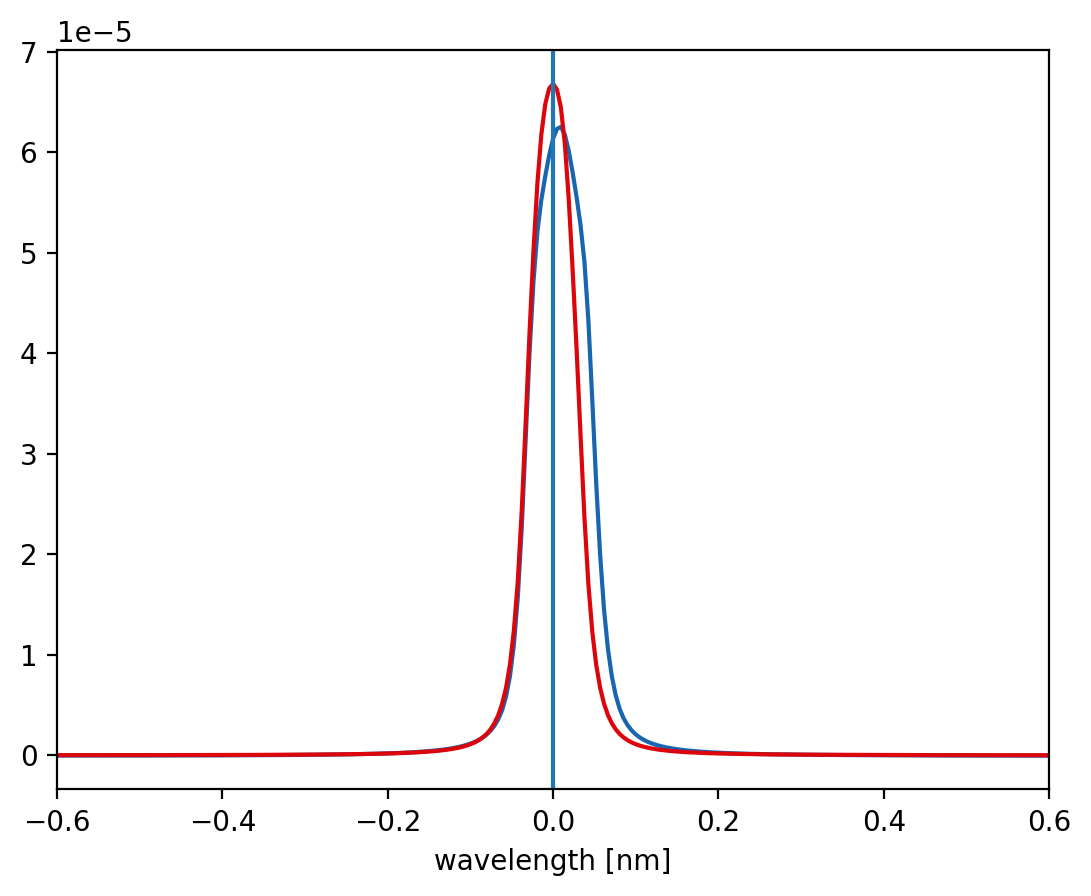

In [30]:
kr=4
wavelengths = (doppler_shift_to_wavelength(486.1,q[kr,:-1]*qnorm))

samples = np.arange(0,50,1)
samples = [11,50]


fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(wavelengths,hbeta[samples[i],:-2]-hbeta[0,:-2],c=cmap_choice2[i],label=timet[i])
#ax.legend(fontsize=5)
ax.set_xlim([-.6,.6])
ax.axvline(0)
ax.set_xlabel('wavelength [nm]')
#ax.invert_xaxis()

Text(0.5, 1.0, 'Dual beam, region D, v2')

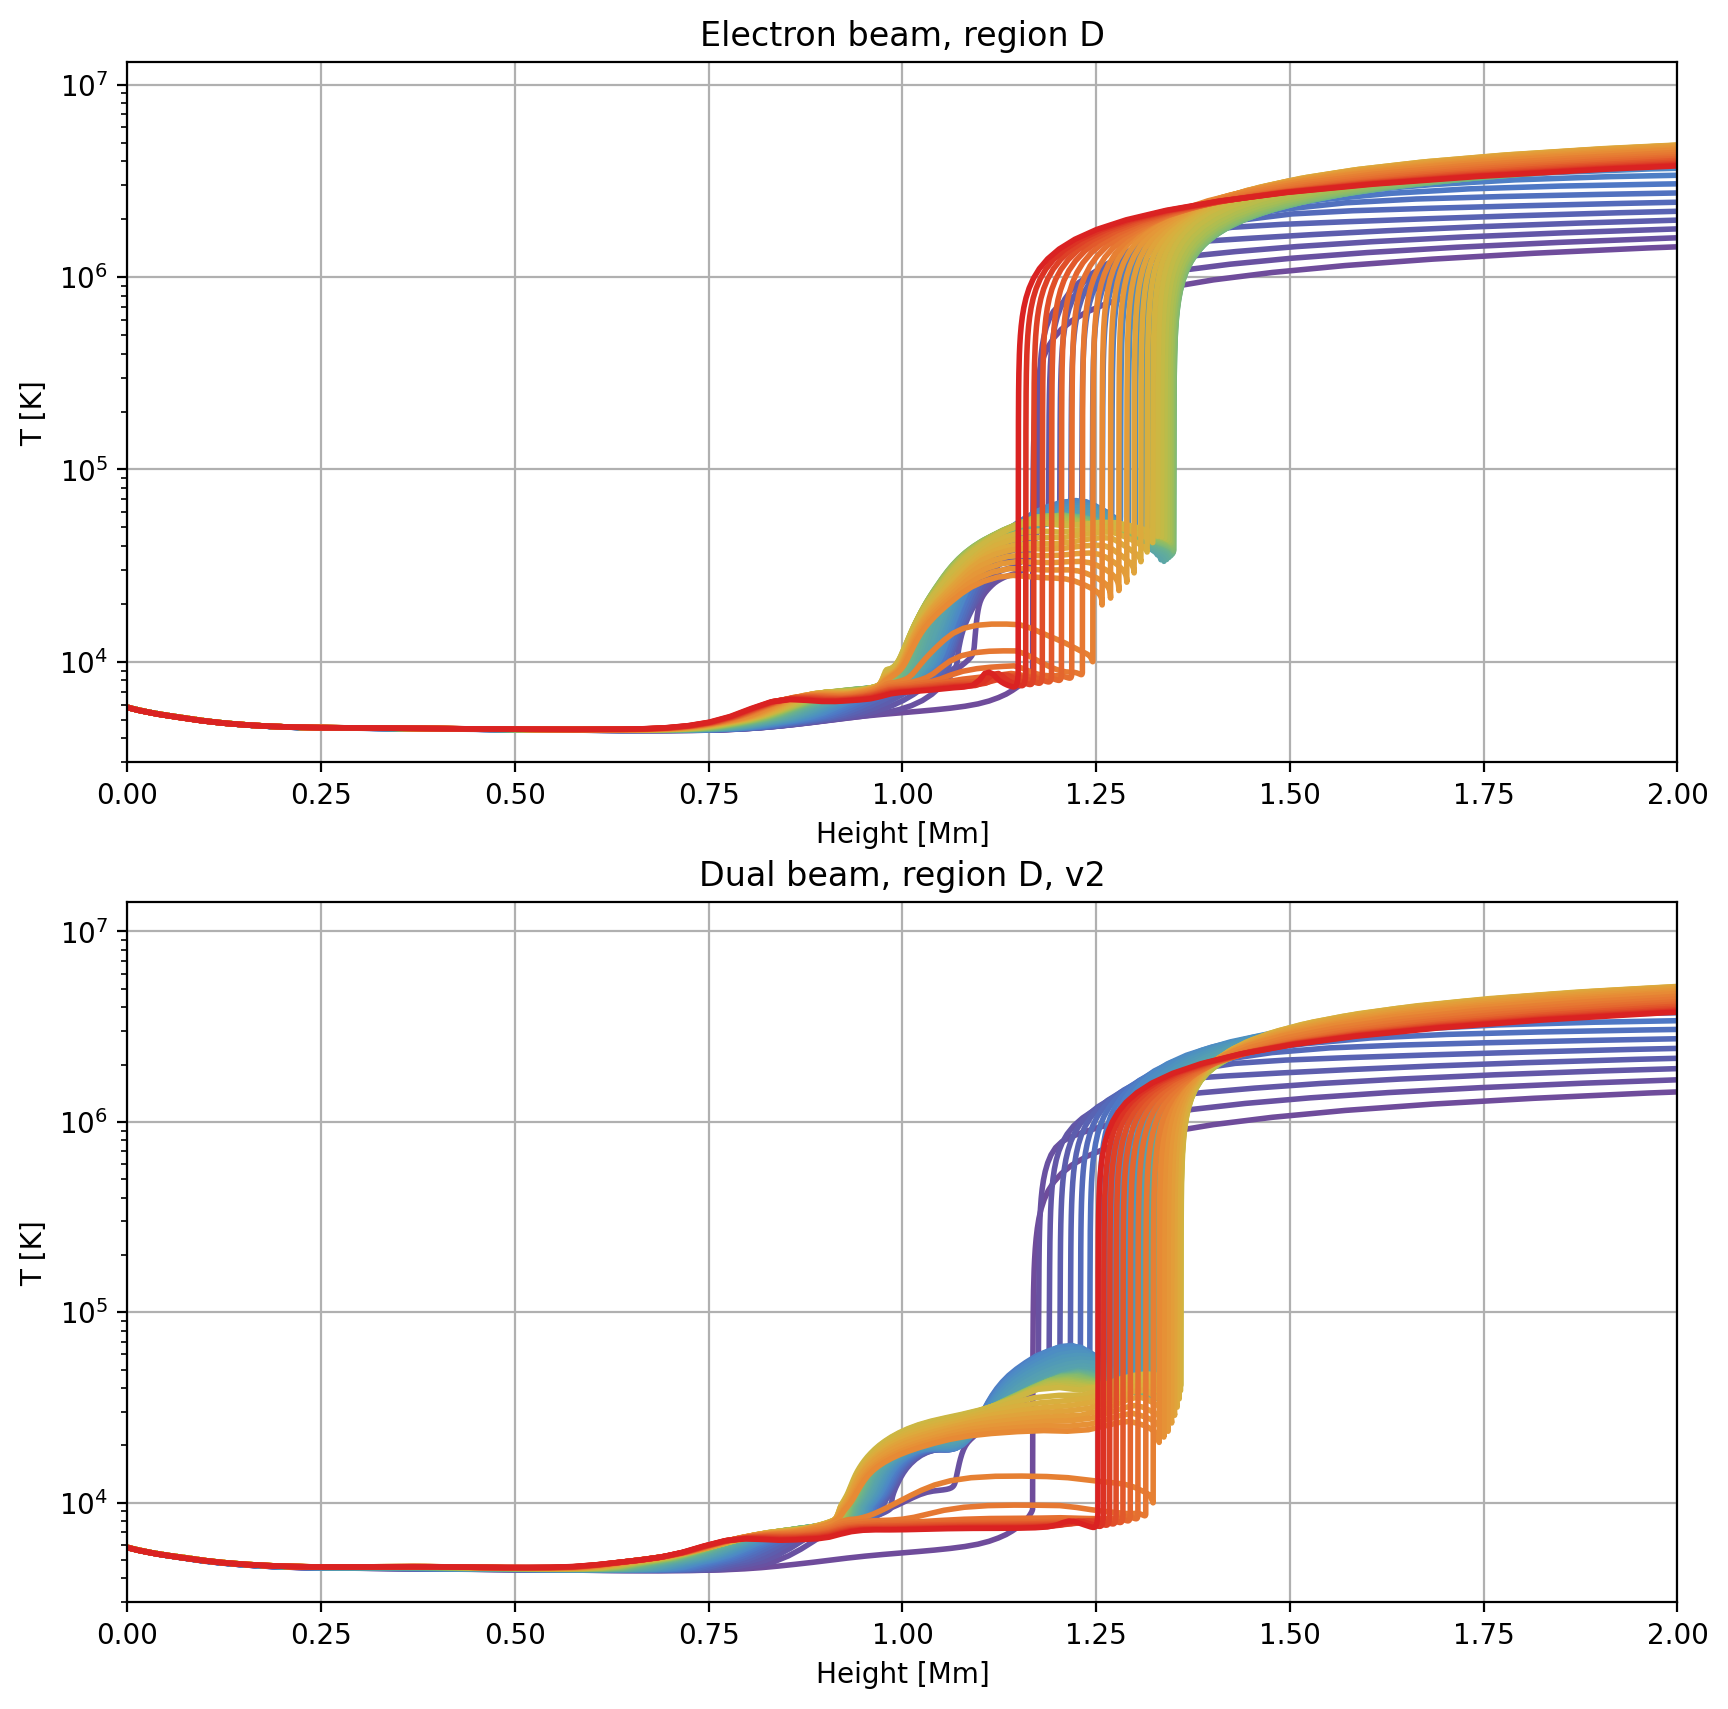

In [489]:
#timesinit=[0,5,10,15,20,50,100,300,500]
#timesinit = [0,2,4,6,8,10,12,14,16,18,20]
samples = np.arange(0,50)
timesinit = samples


ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_PuRd',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

#linestyles = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid','dashed']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)+5))

# cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
#                     '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
#                     '#000000']

fig,[ax1,ax2]=plt.subplots(2,1,dpi=200,figsize=(10,10))
for i in range(len(timesinit)):
    ax1.plot(z1t[int(timesinit[i]),:]/1e8,(tg1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax1.grid()
#ax.legend(fontsize=8)
ax1.set_ylabel('T [K]')
ax1.set_xlabel('Height [Mm]')
ax1.set_xlim([0,2])
ax1.set_yscale('log')

for i in range(len(timesinit)):
    ax2.plot(z1t_2[int(timesinit[i]),:]/1e8,(tg1t_2[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax2.grid()
#ax.legend(fontsize=8)
ax2.set_ylabel('T [K]')
ax2.set_xlabel('Height [Mm]')
ax2.set_xlim([0,2])
ax2.set_yscale('log')

ax1.set_title('Electron beam, region D')
ax2.set_title('Dual beam, region D, v2')

Text(0.5, 1.0, 'Gentle evaporation')

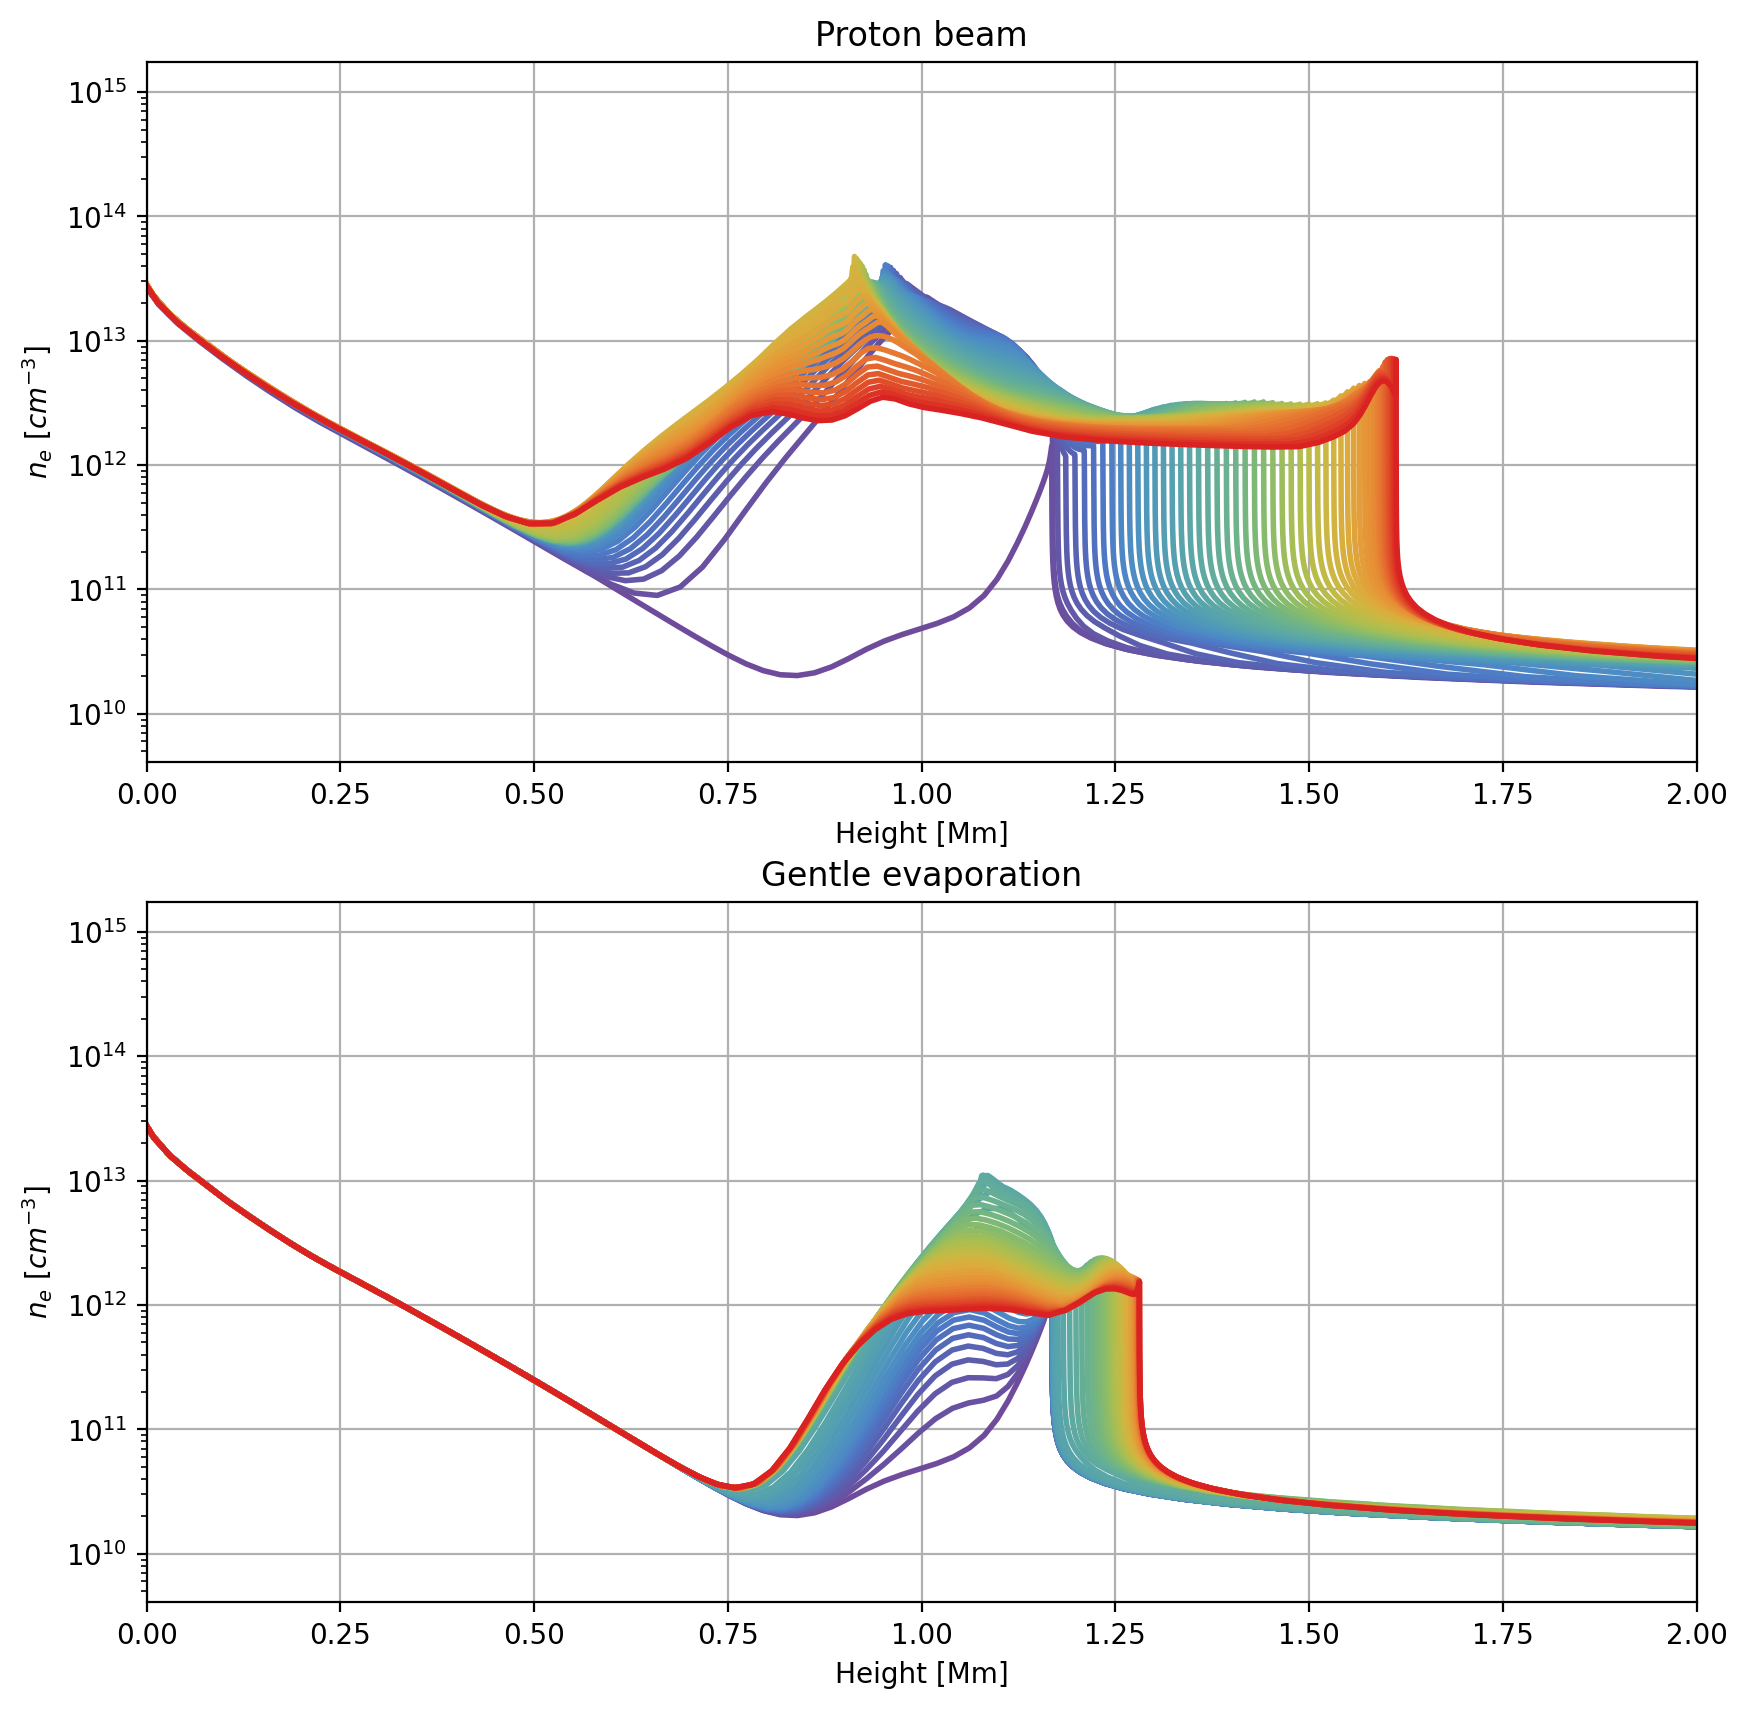

In [365]:
#timesinit=[0,5,10,15,20,50,100,300,500]
#timesinit = [0,2,4,6,8,10,12,14,16,18,20]
samples = np.arange(0,50)
timesinit = samples

# ncol2 = len(timesinit)#+len(times2)
# map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
# cmap_choice2 = map(np.linspace(0,1,ncol2))

# cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
#                     '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
#                     '#000000']

fig,[ax1,ax2]=plt.subplots(2,1,dpi=200,figsize=(10,10))
for i in range(len(timesinit)):
    ax1.plot(z1t[int(timesinit[i]),:]/1e8,(ne1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax1.grid()
#ax.legend(fontsize=3)
ax1.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax1.set_xlabel('Height [Mm]')
ax1.set_xlim([0,2])
ax1.set_yscale('log')


for i in range(len(timesinit)):
    ax2.plot(z1t_2[int(timesinit[i]),:]/1e8,(ne1t_2[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax2.grid()
#ax.legend(fontsize=3)
ax2.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax2.set_xlabel('Height [Mm]')
ax2.set_xlim([0,2])
ax2.set_yscale('log')


ax1.set_title('Proton beam')
ax2.set_title('Gentle evaporation')

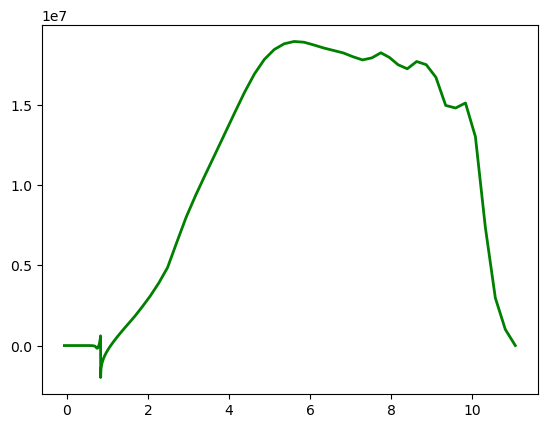

In [50]:
plt.plot(z1t[int(i),:]/1e8,vz1t[i,:],linewidth=2,c='green',label='v_z')


(0.8, 1.3)

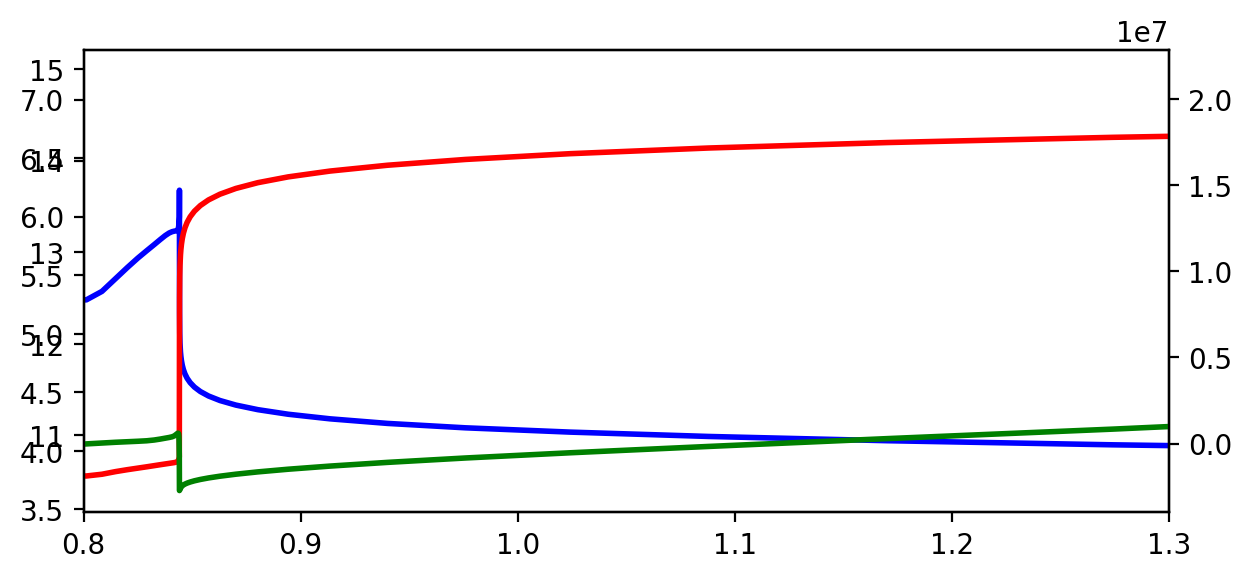

In [51]:
fig,ax=plt.subplots(dpi=200,figsize=(7,3))
i=42
ax.plot(z1t[int(i),:]/1e8,np.log10(ne1t[int(i),:]),linewidth=2,c='blue',label='n_e')
ax2=ax.twinx()
ax2.plot(z1t[int(i),:]/1e8,np.log10(tg1t[int(i),:]),linewidth=2,c='red',label='T')
ax3=ax2.twinx()
ax3.plot(z1t[int(i),:]/1e8,vz1t[i,:],linewidth=2,c='green',label='v_z')
ax.set_xlim([0.8,1.3])
ax.set_xlim([0.8,1.3])



Text(0.5, 1.0, 'Gentle evaporation')

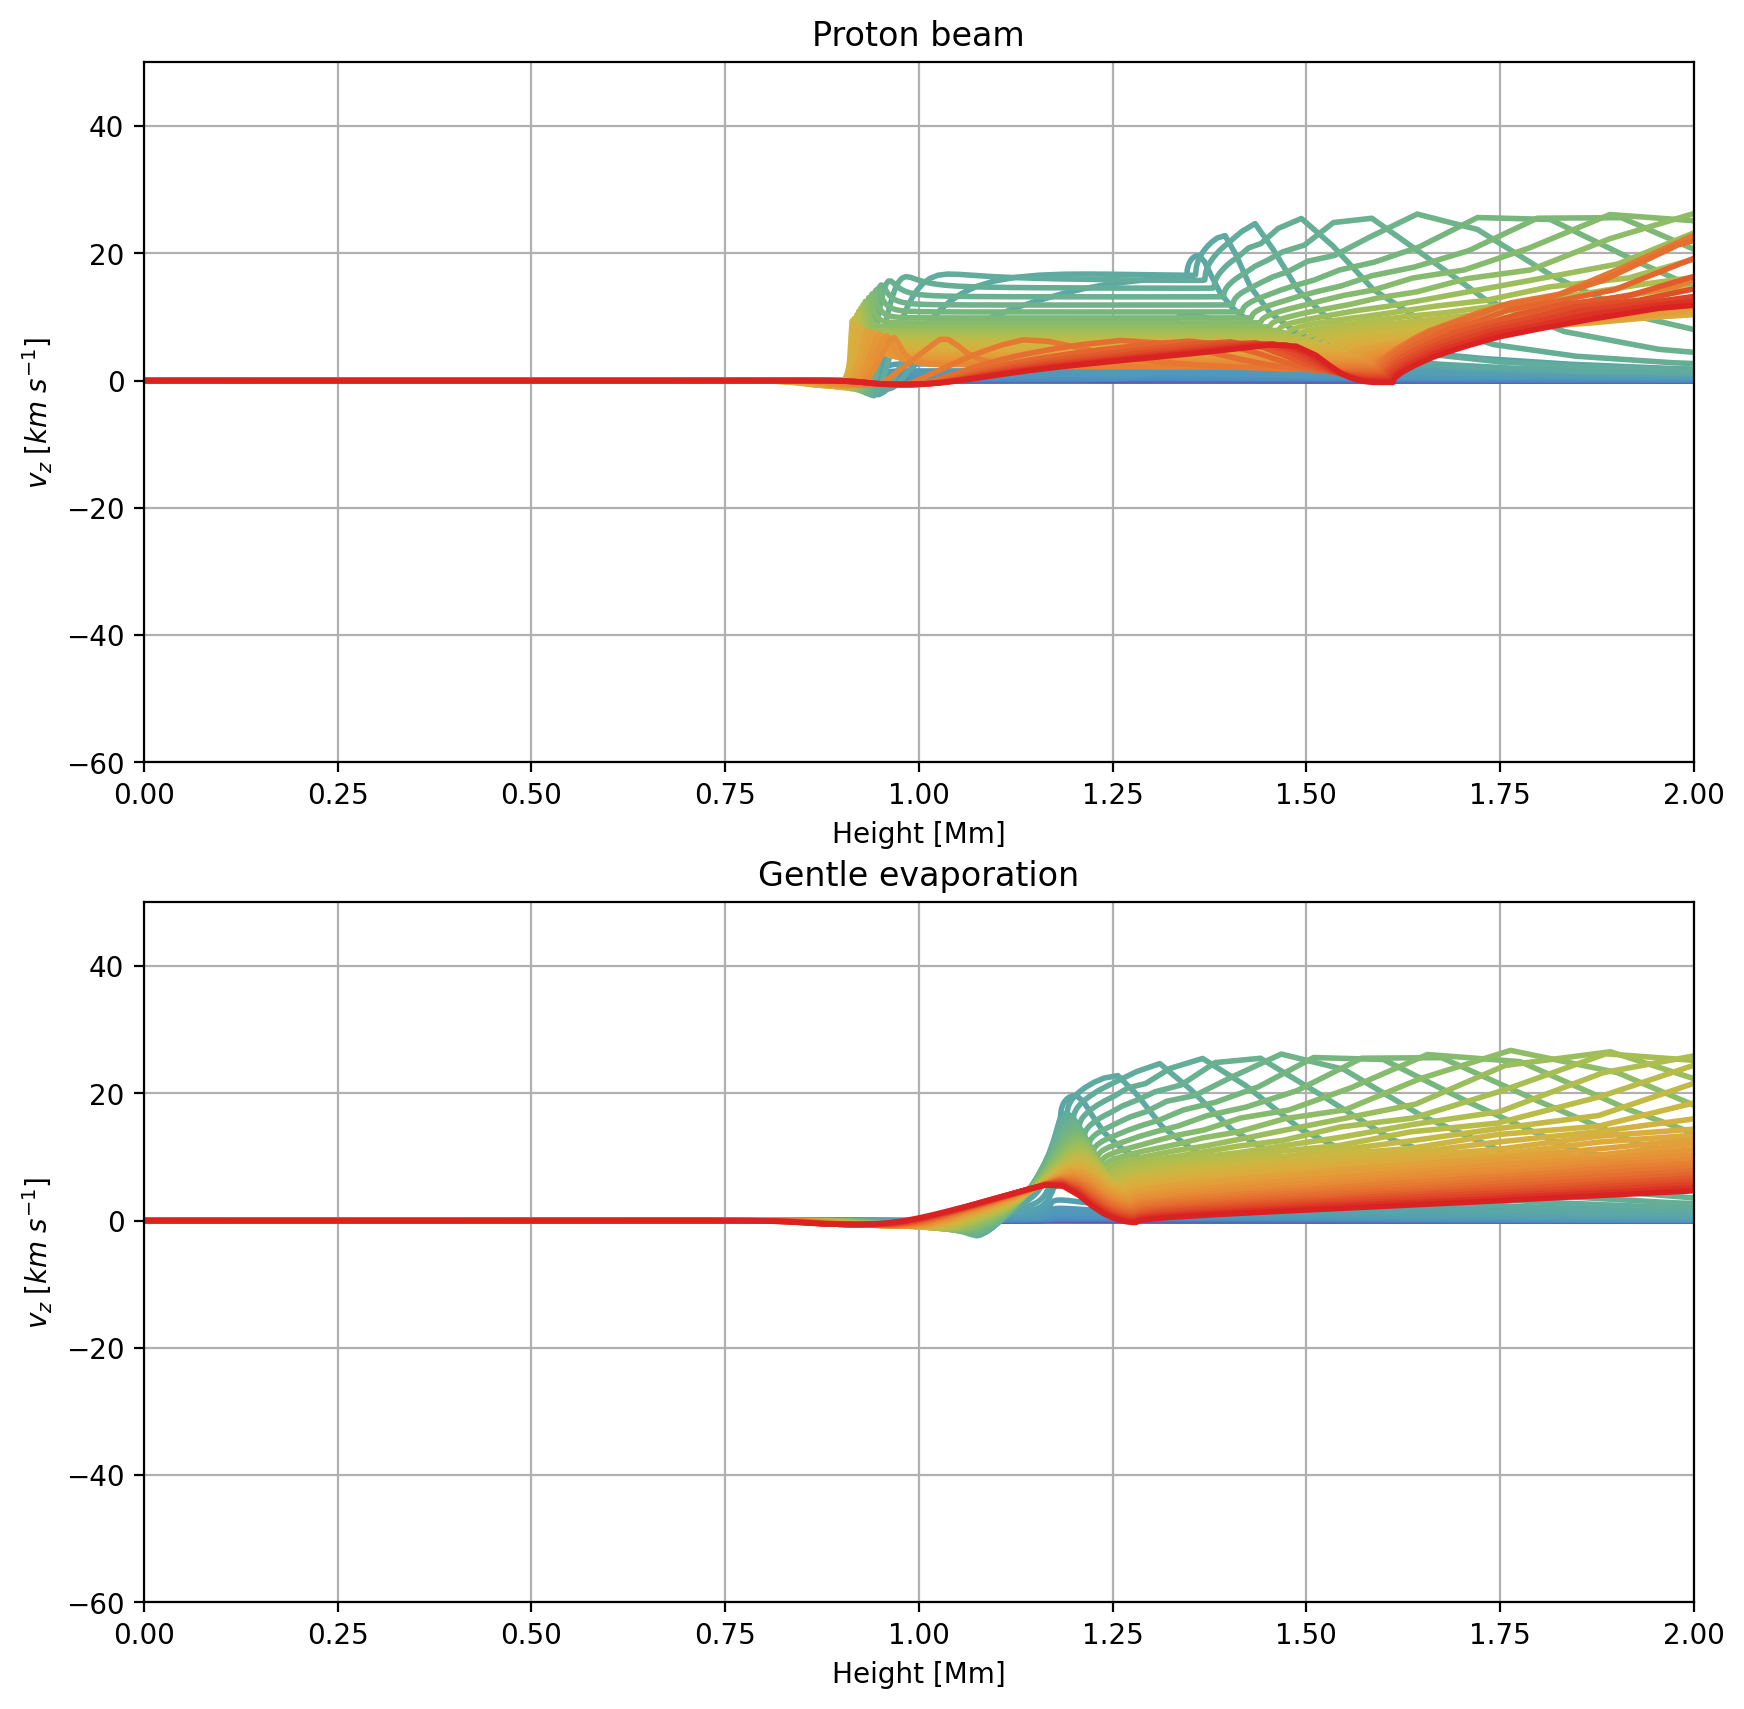

In [368]:
samples = np.arange(0,50,1)
timesinit = samples

#timesinit = [0,10,20,30,40,50,70,90]
# ncol2 = len(timesinit)#+len(times2)
# map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
# cmap_choice2 = map(np.linspace(0,1,ncol2))

# cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
#                     '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
#                     '#000000']

fig,[ax1,ax2]=plt.subplots(2,1,dpi=200,figsize=(10,10))
for i in range(len(timesinit)):
    ax1.plot(z1t[int(timesinit[i]),:]/1e8,(vz1t[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax1.grid()
#ax.legend(fontsize=8,loc='lower left')
ax1.set_ylabel(r'$v_z\; [km\;s^{-1}]$')
ax1.set_xlabel('Height [Mm]')
ax1.set_xlim([0,2])
ax1.set_ylim([-60,50])
#ax.set_yticks([-50,0,50,100,150,200],labels=['+50','0','-50','-100','-150','-200'])
#plt.yscale('log')

for i in range(len(timesinit)):
    ax2.plot(z1t_2[int(timesinit[i]),:]/1e8,(vz1t_2[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax2.grid()
#ax.legend(fontsize=8,loc='lower left')
ax2.set_ylabel(r'$v_z\; [km\;s^{-1}]$')
ax2.set_xlabel('Height [Mm]')
ax2.set_xlim([0,2])
ax2.set_ylim([-60,50])

ax1.set_title('Proton beam')
ax2.set_title('Gentle evaporation')

In [62]:
# rh loading, for wls
base = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/'
#modelname1 = 'cat_15_8_5e10_20_600_500.npz'
modelname1='radyn_TC_90s.npz'
rh_file = np.load(base+modelname1)
kr=16
wl = rh_file['wl_rh']


In [63]:
#radyn wls
line=396.85
x = (doppler_to_wavelength(line,(q[kr,:-100]*qnorm)-1))

In [64]:
np.shape(caii_h[:]-caii_h[0,:])

(321, 100)

In [65]:
len(timet)

321

In [66]:
wls = x[:-1]
#times = np.arange(0,601)
times=timet
X,Y = np.meshgrid(wls,times)

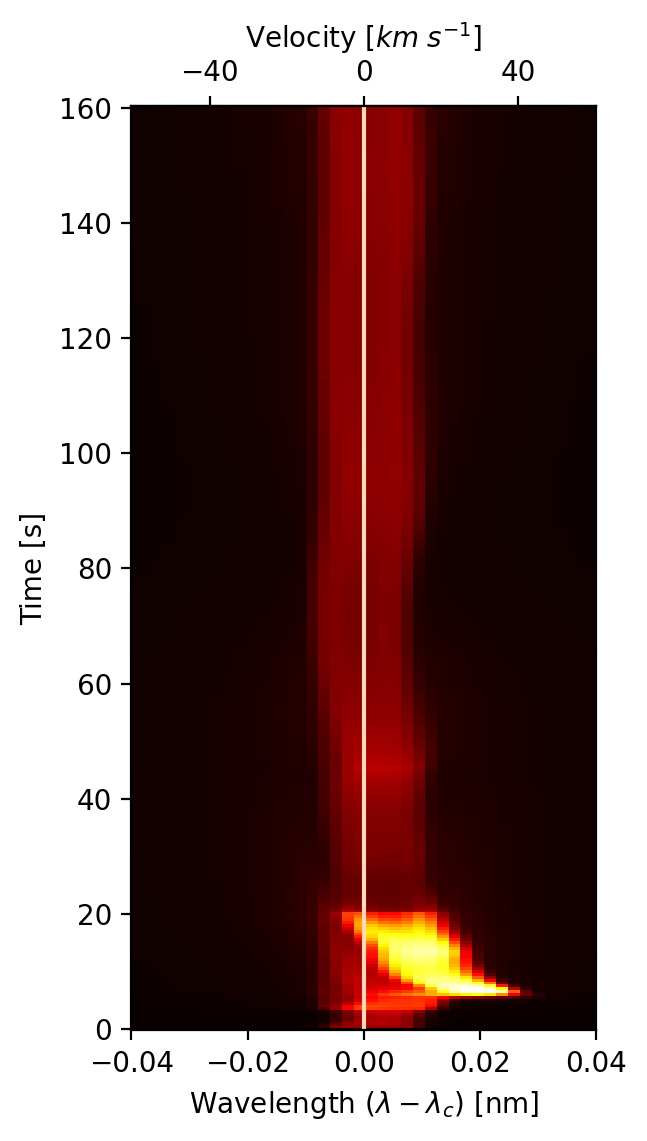

In [69]:
fig,ax=plt.subplots(dpi=200,figsize=(3,6))
ax.pcolormesh(X,Y,caii_h[:]-caii_h[0,:],cmap='hot')
#ax.set_xlim([25,75])
ax.set_xlim([-0.04,0.04])
#ax.set_xticks([396.8,396.85,396.9])
#ax.set_ylim([0,600])
ax.set_ylabel('Time [s]')
ax.axvline(0,c='peachpuff')

ax.set_xlabel(r'Wavelength ($\lambda-\lambda_c$) [nm]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
secaxx.set_xticks([-120,-80,-40,0,40,80,120])
secaxx.grid('on')

#for i in timesinit:
#    ax.axhline(i,c='white',linestyle='dashed',linewidth=.7)

In [49]:
wls

array([ 5.14642615e+00,  3.93170841e+00,  3.00857438e+00,  2.30691434e+00,
        1.77347610e+00,  1.36781164e+00,  1.05919847e+00,  8.24301121e-01,
        6.45395042e-01,  5.09017436e-01,  4.04942565e-01,  3.25403414e-01,
        2.64500502e-01,  2.17752850e-01,  1.81756902e-01,  1.53927470e-01,
        1.32300960e-01,  1.15385914e-01,  1.02049485e-01,  9.14312156e-02,
        8.28775385e-02,  7.58920339e-02,  7.00976433e-02,  6.52079697e-02,
        6.10054788e-02,  5.73249412e-02,  5.40408559e-02,  5.10578979e-02,
        4.83036624e-02,  4.57231540e-02,  4.32746004e-02,  4.09262731e-02,
        3.86540723e-02,  3.64396926e-02,  3.42692295e-02,  3.21321216e-02,
        3.00203458e-02,  2.79278076e-02,  2.58498764e-02,  2.37830338e-02,
        2.17246052e-02,  1.96725564e-02,  1.76253387e-02,  1.55817715e-02,
        1.35409517e-02,  1.15021854e-02,  9.46493516e-03,  7.42877871e-03,
        5.39337718e-03,  3.35844912e-03,  1.32374911e-03, -7.10950897e-04,
       -2.74587896e-03, -

In [50]:
num=-20

plt.plot((psf_adjust(wavelengths[:-50]/u.nm, outintt[int(timesinit[i]),kr,muind,:-52]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-52]*1.9e11,fwhm,wavelengths[:-50]/u.nm,ntw,gaussian_psf)))

IndexError: list index out of range

In [51]:
x

array([ 5.14642615e+00,  3.93170841e+00,  3.00857438e+00,  2.30691434e+00,
        1.77347610e+00,  1.36781164e+00,  1.05919847e+00,  8.24301121e-01,
        6.45395042e-01,  5.09017436e-01,  4.04942565e-01,  3.25403414e-01,
        2.64500502e-01,  2.17752850e-01,  1.81756902e-01,  1.53927470e-01,
        1.32300960e-01,  1.15385914e-01,  1.02049485e-01,  9.14312156e-02,
        8.28775385e-02,  7.58920339e-02,  7.00976433e-02,  6.52079697e-02,
        6.10054788e-02,  5.73249412e-02,  5.40408559e-02,  5.10578979e-02,
        4.83036624e-02,  4.57231540e-02,  4.32746004e-02,  4.09262731e-02,
        3.86540723e-02,  3.64396926e-02,  3.42692295e-02,  3.21321216e-02,
        3.00203458e-02,  2.79278076e-02,  2.58498764e-02,  2.37830338e-02,
        2.17246052e-02,  1.96725564e-02,  1.76253387e-02,  1.55817715e-02,
        1.35409517e-02,  1.15021854e-02,  9.46493516e-03,  7.42877871e-03,
        5.39337718e-03,  3.35844912e-03,  1.32374911e-03, -7.10950897e-04,
       -2.74587896e-03, -

In [78]:
timesinit

[0, 5, 10, 15, 20, 50, 100, 300, 500]

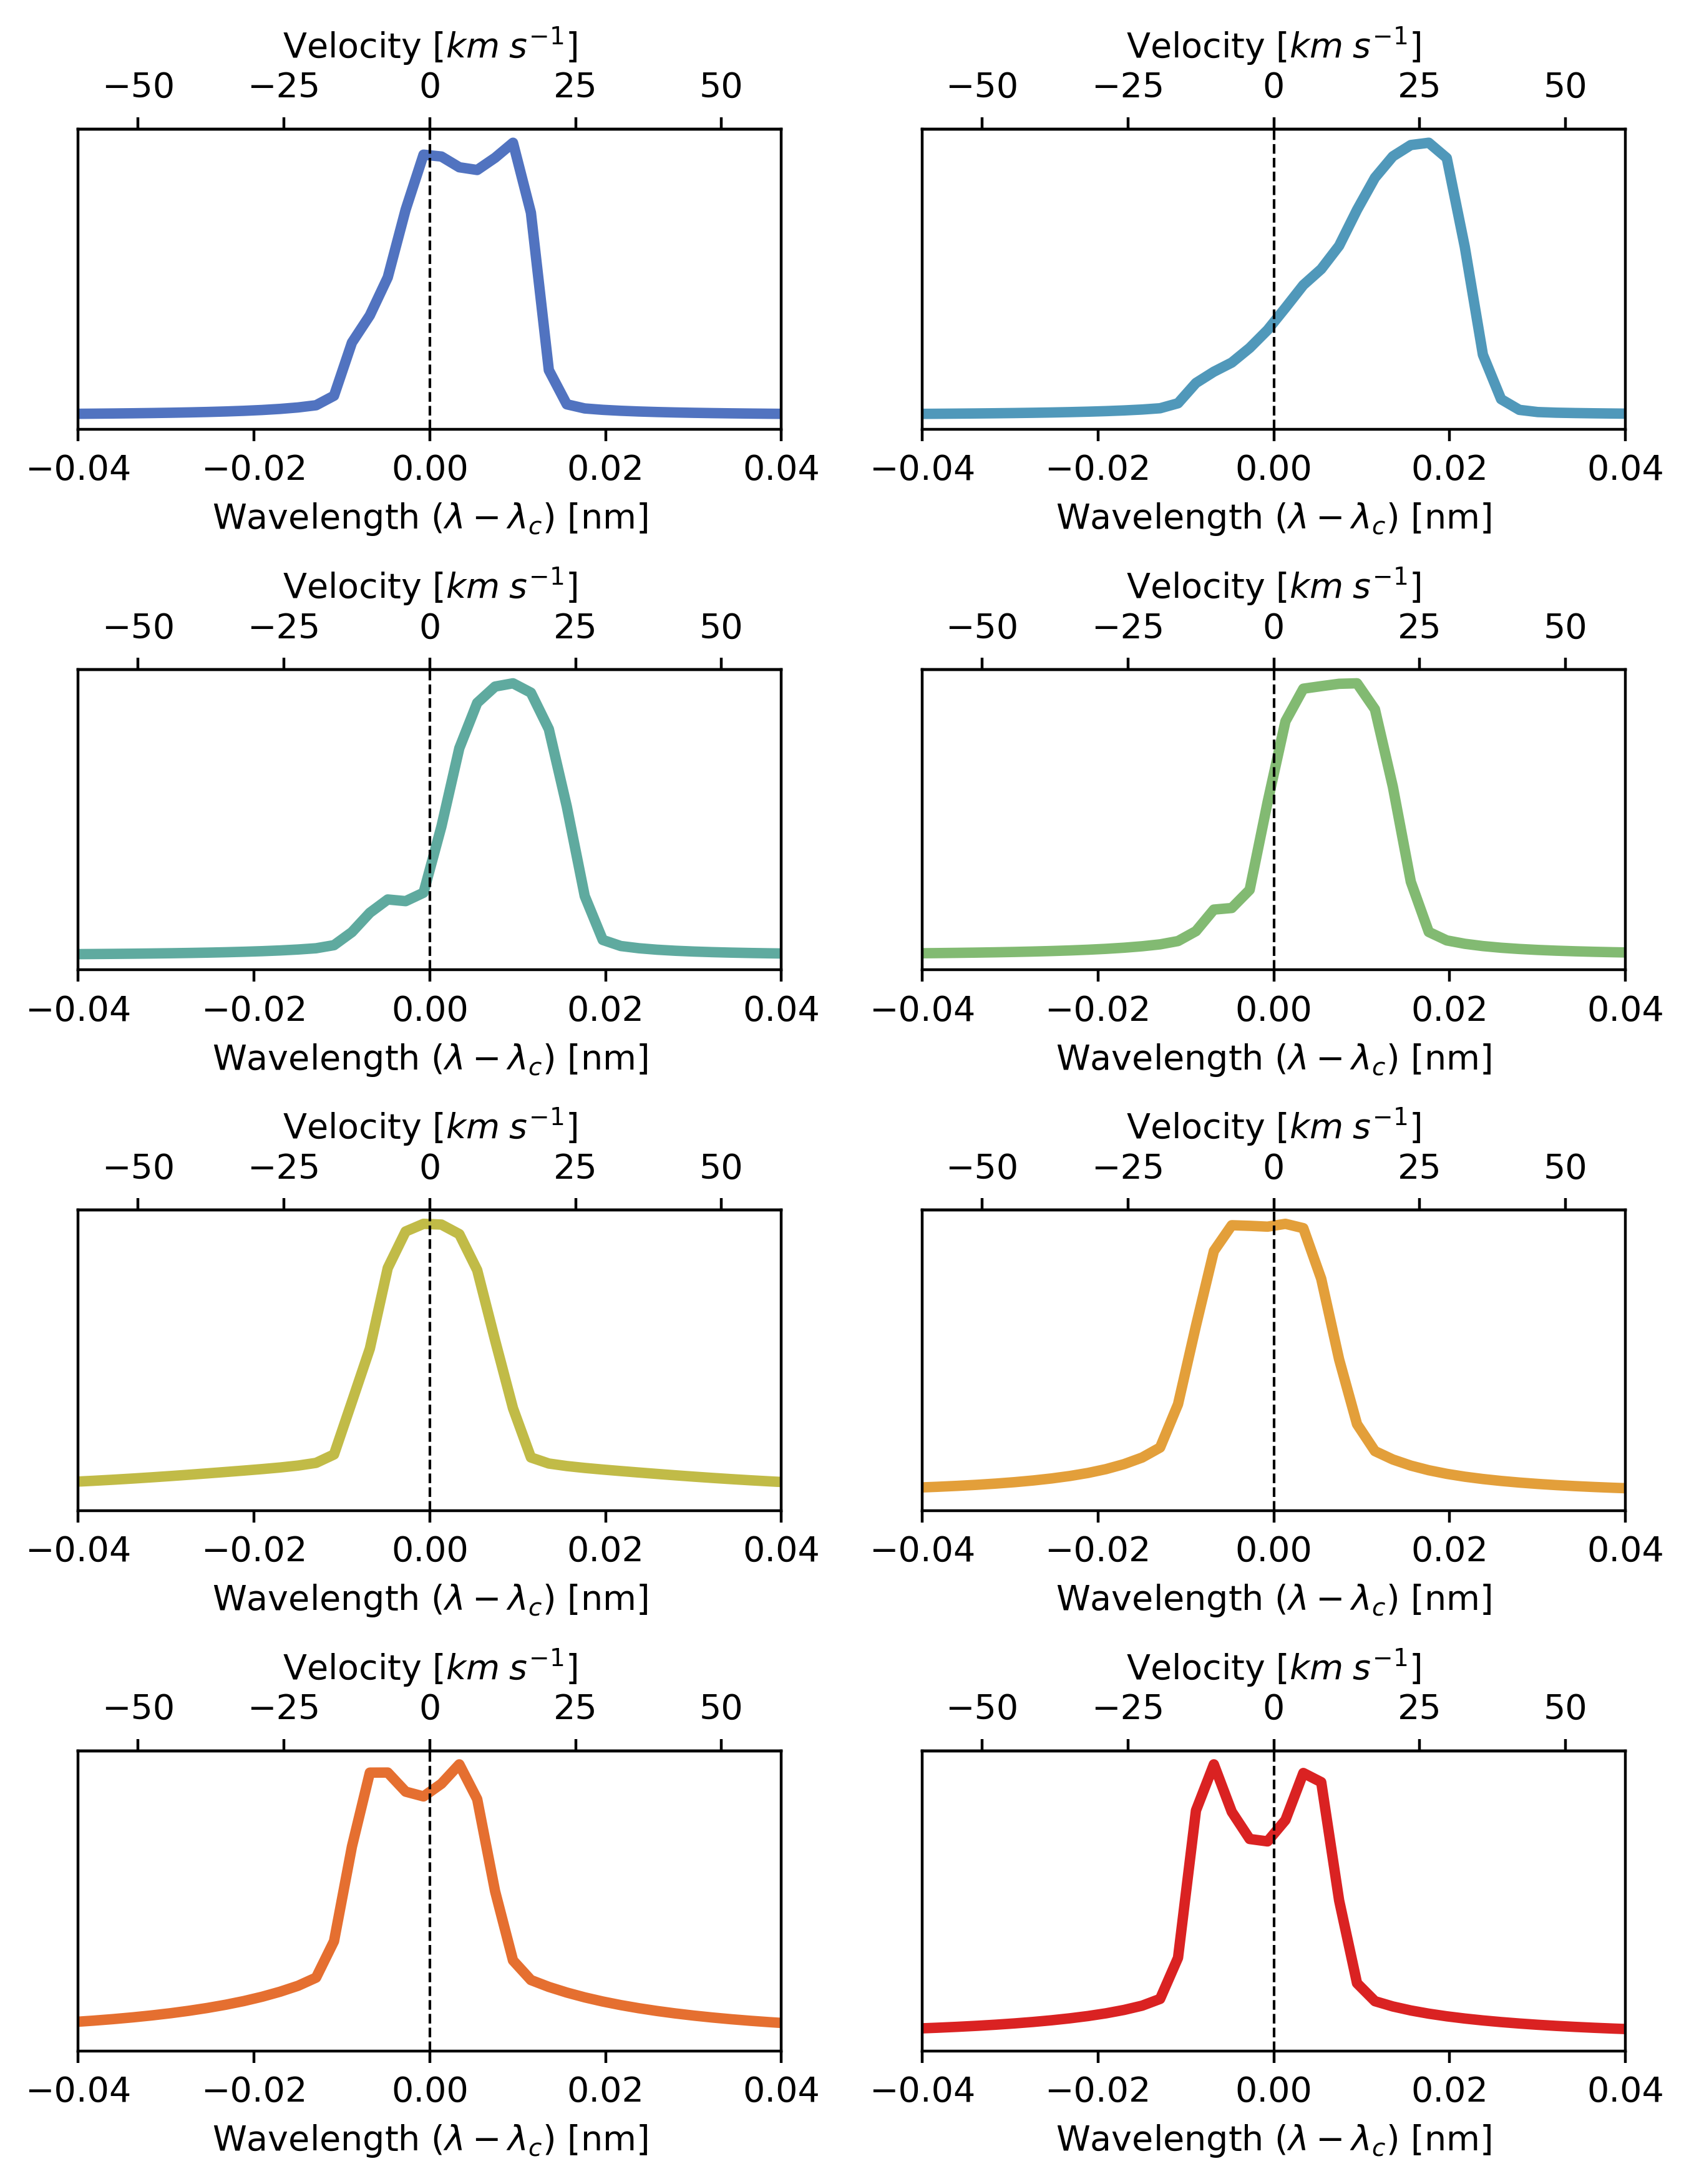

In [80]:
from labellines import *
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))


fig,ax=plt.subplots(4,2,figsize=(8,10),dpi=400)

for i in range(8):
    x = (doppler_to_wavelength(line,(q[kr,:-100]*qnorm)-1))
    
    ax.flatten()[i].plot(x[:-6],(psf_adjust(wavelengths[:-105]/u.nm, outintt[int(timesinit[i+1]),kr,muind,:-107]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-107]*1.9e11,fwhm,wavelengths[:-105]/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i+1],label='t = '+str(round(timesinit[i+1],2))+'s',linewidth=3)
    ax.flatten()[i].axvline(0,c='black',linestyle='dashed',linewidth=0.75)
    ax.flatten()[i].set_xlim([.04,-.04])
    # xvals = np.zeros(30)
    # for i in range(len(xvals)):
    #     xvals[i] = -0.04
    #for i in range(len(times2)):
    #    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
    ax.flatten()[i].invert_xaxis()
    #ax.legend()
    #ax.axvline(0,c='black')
    
    #ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
    secaxx = ax.flatten()[i].secondary_xaxis('top', functions=(veltrans,wltrans))
    secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
    ax.flatten()[i].set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]')
    ax.flatten()[i].tick_params(axis='both', which='major')
    
    secaxx.tick_params(axis='both', which='major')
    #ax.set_ylim([-1,50])
    ax.flatten()[i].yaxis.set_ticks([])
plt.subplots_adjust(hspace=0.8)

In [109]:
!pip install matplotlib-label-lines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 kB 13.4 MB/s eta 0:00:00


[]

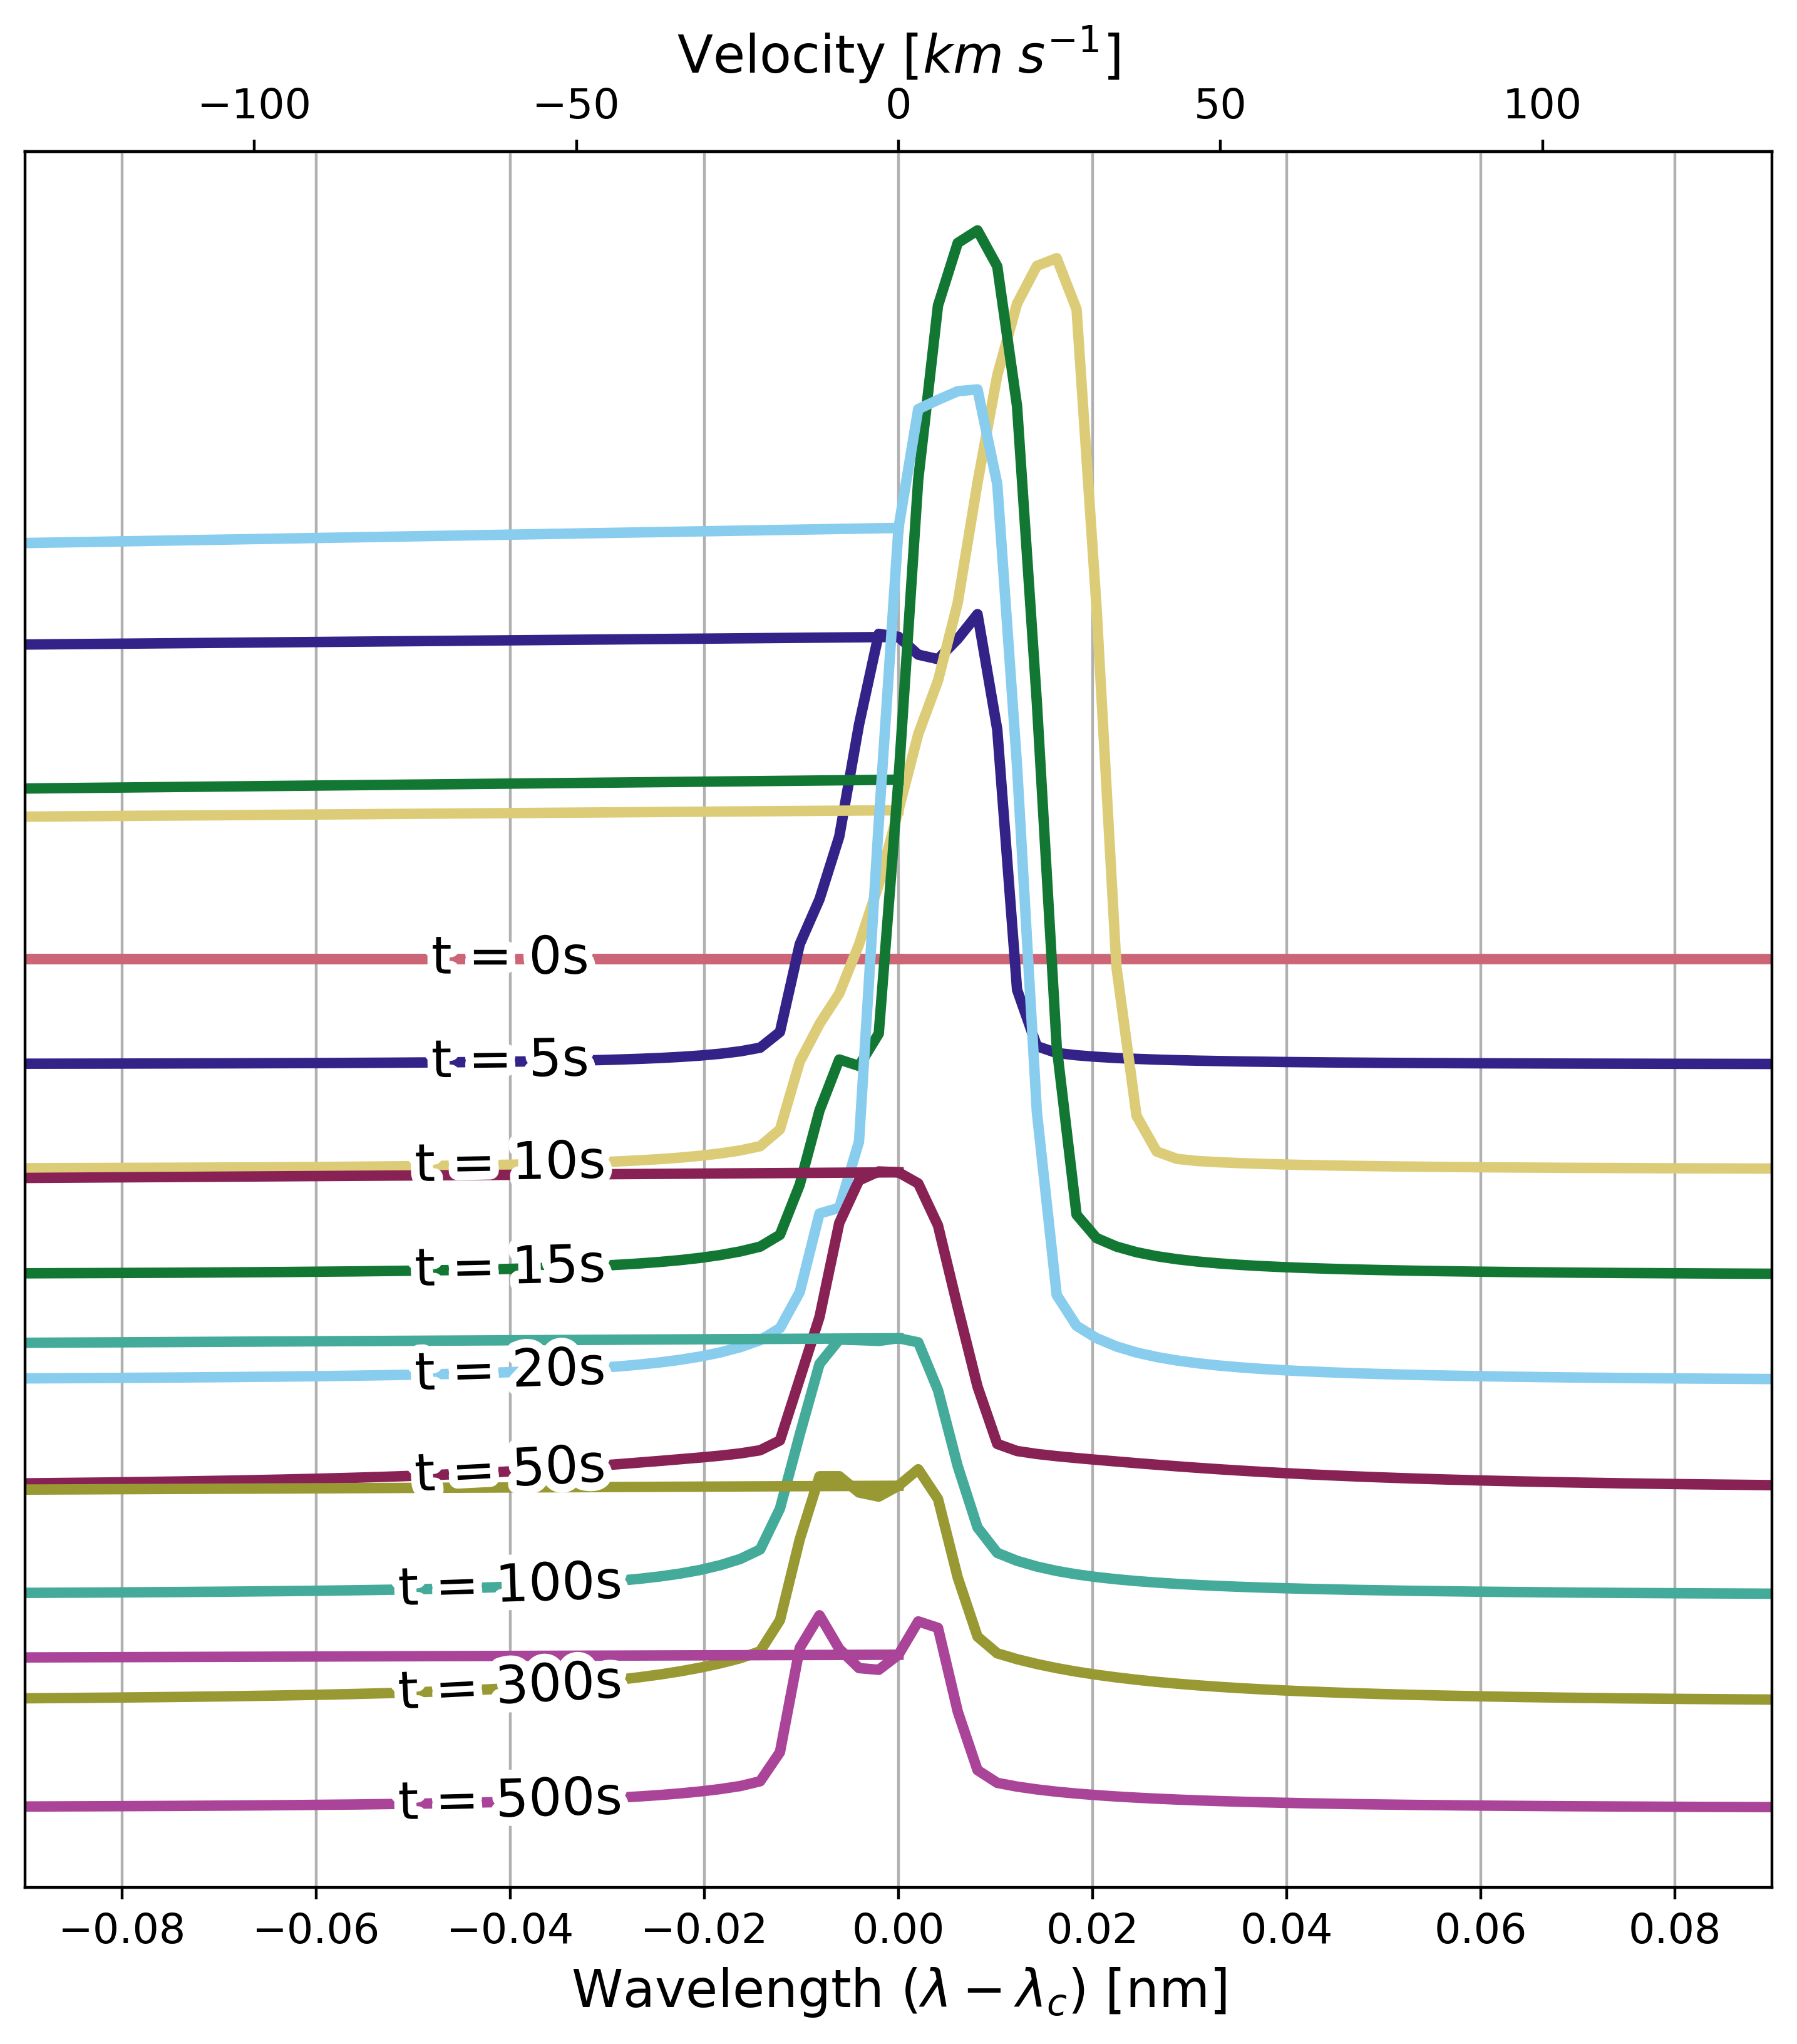

In [30]:
from labellines import *
cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

wavelengths = (doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm))

fig,ax=plt.subplots(figsize=(9,9),dpi=400)
for i in range(len(timesinit)):
    #if i==2:
    #    #ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),marker='o',color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
    #    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[-i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

    #else:
    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[i],label='t = '+str(round(timesinit[i],2))+'s',linewidth=3)
       
    ax.set_xlim([.09,-.09])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
#ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.
ax.yaxis.set_ticks([])

In [175]:
timesinit

[0, 5, 10, 15, 20, 50, 100, 300, 500]

In [131]:
timesinit


[0, 5, 10, 15, 20, 50, 100, 300, 500]

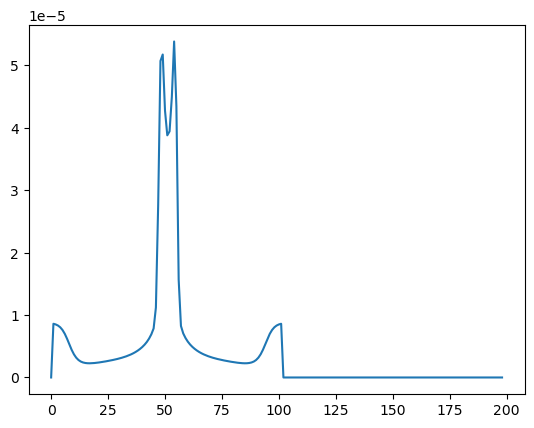

In [132]:
plt.plot(outintt[int(timesinit[8]),kr,muind,:-3])

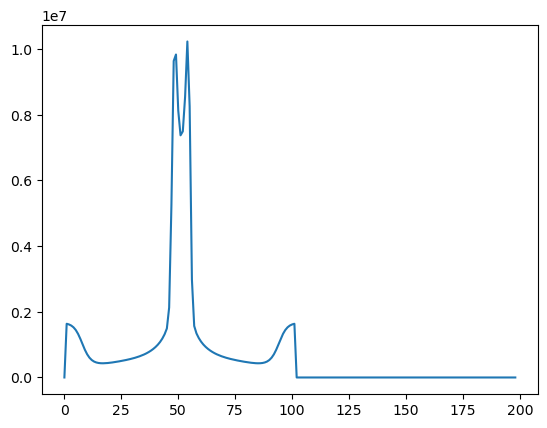

In [135]:
i=8
plt.plot(outintt[int(timesinit[i]),kr,muind,:-3]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-3])